# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [2]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split




### Import data

In [3]:
drive = "D"
date = "20240427"

In [4]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"{0}:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv".format(drive)

In [98]:
csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv"
csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_mask_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_annual_density_near_met_si_fire.csv"

## Set output file locations

In [99]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [100]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [101]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(188, 296)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt_enco', 'burnt_cat', 'fire_sn_ord', 'fire_sn_cat', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_

In [102]:
df = df2.rename(columns={'bio_agb_kg1ha': 'target'})

In [103]:
df

uid  site_clean      date  lon_gda94  lat_gda94  bio_l_kg1ha  \
0      1  agb02.2012  20120417     131.01     -12.65         0.00   
1      2  amg01.2012  20120619     134.05     -16.38       413.63   
2      3  amg03.2012  20120620     134.03     -16.78         0.00   
3      4  amg05.2012  20120621     134.09     -16.73       833.61   
4      5  amg06.2012  20120621     134.09     -16.69       104.28   
..   ...         ...       ...        ...        ...          ...   
183  184   wh07.2012  20120725     130.86     -17.73         8.12   
184  185   wh08.2012  20120725     130.86     -17.80         0.00   
185  186   wh09.2012  20120725     130.83     -17.85         0.00   
186  187   wh13.2012  20120726     130.98     -17.48         0.00   
187  188   wh15.2012  20120727     130.95     -17.57         0.00   

     bio_t_kg1ha  bio_b_kg1ha  bio_w_kg1ha  bio_br_kg1ha  ...  dbifman_NDGI  \
0           0.00         0.00         0.00          0.00  ...      -1538462   
1         448.55      1310.22      3748.31       2886.44  ...      -1957340   
2           0.00         0.00         0.00          0.00  ...      -2352241   
3         906.47      3541.76     11522.39       8737.58  ...      -1547117   
4         113.39       443.05      1441.38       1093.02  ...      -1831480   
..           ...          ...          ...           ...  ...           ...   
183         8.83        34.49       112.20         85.08  ...      -1703267   
184         0.00         0.00         0.00          0.00  ...      -1869976   
185         0.00         0.00         0.00          0.00  ...      -2225307   
186         0.00         0.00         0.00          0.00  ...      -1790315   
187         0.00         0.00         0.00          0.00  ...      -1807487   

     dbifman_RI  dbifman_NBR  dbifman_NDII  dbifman_GDVI  dbifman_MSAVI  \
0       1538462      1964774       -383207       1409000        2022182   
1       1957340      2000000       -151893       1531000        1970310   
2       2352241      1517103       -791506       1898000        1886128   
3       1547117       -67818      -1695876       1010000        1328451   
4       1831480      2119225        106885       1335000        1645692   
..          ...          ...           ...           ...            ...   
183     1703267      -455946      -1320913       1549000        1219221   
184     1869976       -25406      -1260274       1389000        1231185   
185     2225307      1043812       -857429       1755000        1739149   
186     1790315       210877      -1155972        916000         796359   
187     1807487       377725      -1386600       1255000        1090584   

     dbifman_DVI  dbifman_SAVI  dbifman_NDVI  dbifman_MSR  
0        1205000       2336781       4405850      6047316  
1        1219000       2250462       3900800      5096750  
2        1305000       2078246       2953157      3557840  
3         790000       1594456       3248355      4008002  
4        1022000       1905768       3357424      4180551  
..           ...           ...           ...          ...  
183       913000       1331810       1728185      1907346  
184       854000       1384865       2009412      2259464  
185      1194000       1930789       2792329      3322243  
186       513000        942206       1619829      1775340  
187       748000       1238411       1842365      2048613  

[188 rows x 296 columns]

## Main only

In [104]:
# #main only
# var_ = "main_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

In [111]:
#main major and h99 
var_ = "main_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major", "h99"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

In [112]:
df2

site_clean   target  fire_mean  fire_major  rain_d_mean  et_ma_mean  \
0    agb02.2012     0.00       0.00           0         0.00        2.00   
1    amg01.2012  8376.22      10.00          10         0.00        0.10   
2    amg03.2012     0.00      10.00          10         0.00        0.20   
3    amg05.2012 24670.80       9.75          10         0.00        0.70   
4    amg06.2012  3086.16       5.00           5         0.00        0.70   
..          ...      ...        ...         ...          ...         ...   
183   wh07.2012   240.24       0.00           0         0.00        0.30   
184   wh08.2012     0.00       0.00           0         0.00        0.30   
185   wh09.2012     0.00       0.00           0         0.00        0.30   
186   wh13.2012     0.00       0.00           0         0.00        0.10   
187   wh15.2012     0.00       0.00           0         0.00        0.10   

     tmax_mean  tmin_mean  rh_tmax_mean  rh_tmin_mean  ...  b1_ccw_mean  \
0        35.60      22.30       3319.00       3368.30  ...        70.67   
1        27.00       9.10       3294.40       3331.90  ...        66.11   
2        26.90       6.70       3296.00       3346.80  ...        16.92   
3        27.30       5.50       3301.90       3376.50  ...        49.33   
4        27.30       5.60       3302.10       3376.50  ...        52.11   
..         ...        ...           ...           ...  ...          ...   
183      30.20       9.20       3298.60       3358.20  ...         1.00   
184      30.10       9.10       3298.50       3357.90  ...         3.25   
185      30.00       9.00       3298.40       3357.60  ...        29.78   
186      30.00      12.40       3297.20       3337.70  ...         2.75   
187      25.00      12.70       3298.60       3324.20  ...         4.83   

     b1_dp1fm_mean  b2_dp1fm_mean  b3_dp1fm_mean  b1_dbifm_mean  \
0            10.33          46.00          42.00         373.67   
1            13.11          30.00          55.56         322.89   
2             4.83           8.17          85.50         546.58   
3            15.50          17.83          65.25         372.58   
4            24.78          25.78          48.11         340.44   
..             ...            ...            ...            ...   
183          60.42           4.50          33.42         949.33   
184          36.50           7.25          54.75         765.25   
185          13.78          11.89          72.44         623.89   
186          35.56           3.06          59.81         597.75   
187          12.56           0.78          85.67         761.33   

     b2_dbifm_mean  b3_dbifm_mean  b4_dbifm_mean  b5_dbifm_mean  b6_dbifm_mean  
0           561.00         765.67        1970.00        2127.00        1323.67  
1           641.56         953.33        2172.00        2239.56        1448.00  
2           964.00        1557.42        2862.42        3354.67        2108.17  
3           601.67         821.17        1611.08        2269.42        1633.50  
4           698.89        1011.89        2033.78        1990.33        1322.56  
..             ...            ...            ...            ...            ...  
183        1549.83        2185.08        3098.17        4041.00        3394.50  
184        1163.33        1698.83        2552.25        3288.00        2565.33  
185         980.78        1541.67        2735.78        3248.67        2218.11  
186         924.19        1327.62        1840.31        2321.94        1764.31  
187        1149.56        1656.00        2404.56        3178.00        2229.56  

[188 rows x 38 columns]

### Logical selection

## dp1_dbi_si_dry_mask_density_near_met_si_fire.csv

In [106]:
df2 =df[['site_clean', 
 'target', 
 'fire_count', 
 'fire_min', 
 'fire_max', 
 'fire_mean', 
 'fire_sum', 
 'fire_std', 
 'fire_med', 
 'fire_major', 
 'fire_minor', 
#  'jan', 
#  'feb', 
#  'mar', 
#  'april', 
#  'may', 
#  'june', 
#  'july', 
#  'aug', 
#  'sep', 
#  'oct', 
#  'nov', 
#  'dec', 
#   'jan_per', 
#  'feb_per', 
#  'mar_per', 
#  'april_per', 
#  'may_per', 
#  'june_per', 
#  'july_per', 
#  'aug_per',
#  'sep_per', 
#  'oct_per', 
#  'nov_per', 
#  'dec_per', 
 'burnt_enco', 
#  'burnt_cat', 
 'fire_sn_ord', 
#  'fire_sn_cat', 
 'fire_f', 
 'fire_tot', 
 'since_fire', 
 'fire_gap', 
 'fire_pois1_2', 
 'fire_pois1_5', 
 'fire_pois1_10', 
#  'tot_an_emsi_avg', 
#  'tot_an_emsi_avg_R', 
 'tot_an_emsi_avg_si', 
#  'emsi_dt', 
#  'tot_an_drsi_avg', 
#  'tot_an_drsi_avg_R', 
 'tot_an_drsi_avg_si', 
#  'drsi_dt', 
 'tot_avg_emse_djf', 
 'tot_avg_emse_mam', 
 'tot_avg_emse_jja', 
 'tot_avg_emse_son', 
 'tot_avg_emse_dry', 
 'tot_avg_emse_wet', 
 'tot_avg_emse_annual', 
#  'emse_dt', 
 'tot_avg_drse_djf', 
 'tot_avg_drse_mam', 
 'tot_avg_drse_jja', 
 'tot_avg_drse_son', 
 'tot_avg_drse_dry', 
 'tot_avg_drse_wet', 
 'tot_avg_drse_annual', 
#  'drse_dt', 
 'rain_d_mean', 
 'et_ma_mean', 
 'tmax_mean', 
 'tmin_mean', 
 'rh_tmax_mean', 
 'rh_tmin_mean', 
#  'b1_wfp_dry_min', 
#  'b1_wfp_dry_max', 
 'b1_wfp_dry_mean', 
#  'b1_wfp_dry_std', 
#  'b1_wfp_dry_med', 
#  'b1_wfp_dry_p25', 
 'b1_wfp_dry_p50', 
#  'b1_wfp_dry_p75', 
#  'b1_wfp_dry_p95', 
 'b1_wfp_dry_p99', 
 'b1_wdc_dry_major', 
#  'b1_wdc_dry_minor', 
 'b1_n17_dry_major', 
#  'b1_n17_dry_minor', 
#  'b1_hsd_min', 
#  'b1_hsd_max', 
 'b1_hsd_mean', 
#  'b1_hsd_std', 
#  'b1_hsd_med', 
#  'b1_hsd_p25', 
 'b1_hsd_p50', 
#  'b1_hsd_p75', 
#  'b1_hsd_p95', 
 'b1_hsd_p99', 
#  'b1_hmc_min', 
#  'b1_hmc_max', 
 'b1_hmc_mean', 
#  'b1_hmc_std', 
#  'b1_hmc_med', 
#  'b1_hmc_p25', 
 'b1_hmc_p50', 
#  'b1_hmc_p75', 
#  'b1_hmc_p95', 
 'b1_hmc_p99', 
#  'b1_hcv_min', 
#  'b1_hcv_max', 
 'b1_hcv_mean', 
#  'b1_hcv_std', 
#  'b1_hcv_med', 
#  'b1_hcv_p25', 
 'b1_hcv_p50', 
#  'b1_hcv_p75', 
#  'b1_hcv_p95', 
 'b1_hcv_p99', 
#  'hcv_dt', 
#  'b1_h99_min', 
#  'b1_h99_max', 
 'b1_h99_mean', 
#  'b1_h99_std', 
#  'b1_h99_med', 
#  'b1_h99_p25',
 'b1_h99_p50', 
#  'b1_h99_p75', 
#  'b1_h99_p95', 
 'b1_h99_p99', 
 'b1_fdc_dry_major', 
#  'b1_fdc_dry_minor', 
#  'b1_ccw_dry_min', 
#  'b1_ccw_dry_max', 
 'b1_ccw_dry_mean', 
#  'b1_ccw_dry_std', 
#  'b1_ccw_dry_med', 
#  'b1_ccw_dry_p25', 
 'b1_ccw_dry_p50', 
#  'b1_ccw_dry_p75', 
#  'b1_ccw_dry_p95', 
 'b1_ccw_dry_p99', 
#  'b1_dbifm_dry_min', 
#  'b1_dbifm_dry_max', 
 'b1_dbifm_dry_mean', 
#  'b1_dp1fm_dry_min', 
#  'b1_dp1fm_dry_max', 
 'b1_dp1fm_dry_mean', 
#  'b1_dp1fm_dry_std',
#  'b1_dp1fm_dry_med', 
#  'b1_dp1fm_dry_p25', 
 'b1_dp1fm_dry_p50',
#  'b1_dp1fm_dry_p75',
#  'b1_dp1fm_dry_p95', 
 'b1_dp1fm_dry_p99', 
#  'b2_dp1fm_dry_min', 
#  'b2_dp1fm_dry_max', 
 'b2_dp1fm_dry_mean', 
#  'b2_dp1fm_dry_std', 
#  'b2_dp1fm_dry_med', 
#  'b2_dp1fm_dry_p25', 
 'b2_dp1fm_dry_p50', 
#  'b2_dp1fm_dry_p75',
 'b2_dp1fm_dry_p95', 
#  'b2_dp1fm_dry_p99', 
#  'b3_dp1fm_dry_min', 
#  'b3_dp1fm_dry_max', 
 'b3_dp1fm_dry_mean', 
#  'b3_dp1fm_dry_std',
#  'b3_dp1fm_dry_med',
#  'b3_dp1fm_dry_p25',
 'b3_dp1fm_dry_p50', 
#  'b3_dp1fm_dry_p75', 
#  'b3_dp1fm_dry_p95',
 'b3_dp1fm_dry_p99', 
#  'b1_dbifm_dry_std',
#  'b1_dbifm_dry_med',
#  'b1_dbifm_dry_p25', 
 'b1_dbifm_dry_p50', 
#  'b1_dbifm_dry_p75', 
#  'b1_dbifm_dry_p95', 
 'b1_dbifm_dry_p99', 
#  'b2_dbifm_dry_min', 
#  'b2_dbifm_dry_max', 
 'b2_dbifm_dry_mean', 
#  'b2_dbifm_dry_std', 
#  'b2_dbifm_dry_med', 
#  'b2_dbifm_dry_p25', 
 'b2_dbifm_dry_p50', 
#  'b2_dbifm_dry_p75', 
#  'b2_dbifm_dry_p95', 
 'b2_dbifm_dry_p99', 
#  'b3_dbifm_dry_min', 
#  'b3_dbifm_dry_max', 
 'b3_dbifm_dry_mean', 
#  'b3_dbifm_dry_std',
#  'b3_dbifm_dry_med', 
#  'b3_dbifm_dry_p25', 
 'b3_dbifm_dry_p50', 
#  'b3_dbifm_dry_p75', 
#  'b3_dbifm_dry_p95', 
 'b3_dbifm_dry_p99', 
#  'b4_dbifm_dry_min', 
#  'b4_dbifm_dry_max', 
 'b4_dbifm_dry_mean', 
#  'b4_dbifm_dry_std', 
#  'b4_dbifm_dry_med', 
#  'b4_dbifm_dry_p25', 
 'b4_dbifm_dry_p50', 
#  'b4_dbifm_dry_p75', 
#  'b4_dbifm_dry_p95', 
 'b4_dbifm_dry_p99', 
#  'b5_dbifm_dry_min', 
#  'b5_dbifm_dry_max', 
 'b5_dbifm_dry_mean', 
#  'b5_dbifm_dry_std', 
#  'b5_dbifm_dry_med', 
#  'b5_dbifm_dry_p25',
 'b5_dbifm_dry_p50', 
#  'b5_dbifm_dry_p75',
#  'b5_dbifm_dry_p95', 
 'b5_dbifm_dry_p99', 
#  'b6_dbifm_dry_min', 
#  'b6_dbifm_dry_max', 
 'b6_dbifm_dry_mean', 
#  'b6_dbifm_dry_std',
#  'b6_dbifm_dry_med', 
#  'b6_dbifm_dry_p25', 
 'b6_dbifm_dry_p50',
#  'b6_dbifm_dry_p75', 
#  'b6_dbifm_dry_p95', 
 'b6_dbifm_dry_p99',
#  'dbifmdry_psB1a', 
#  'dbifmdry_psB2a', 
#  'dbifmdry_psB3a', 
#  'dbifmdry_psB4a', 
#  'dbifmdry_psB5a', 
#  'dbifmdry_psB6a', 
 'dbifmdry_r32',
 'dbifmdry_r42', 
 'dbifmdry_r43', 
 'dbifmdry_r52', 
 'dbifmdry_r53', 
 'dbifmdry_r54', 
 'dbifmdry_r62', 
 'dbifmdry_r63', 
 'dbifmdry_r64', 
 'dbifmdry_r65', 
 'dbifmdry_GSAVI', 
 'dbifmdry_GNDVI', 
 'dbifmdry_CVI', 
 'dbifmdry_NDGI', 
 'dbifmdry_RI', 
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI', 
 'dbifmdry_MSAVI', 
 'dbifmdry_DVI', 
 'dbifmdry_SAVI', 
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
        ]]

KeyError: "['b3_dp1fm_dry_p50', 'dbifmdry_r63', 'dbifmdry_NDGI', 'b2_dp1fm_dry_p95', 'b2_dp1fm_dry_mean', 'b3_dbifm_dry_mean', 'b1_wdc_dry_major', 'b1_ccw_dry_p99', 'dbifmdry_r42', 'dbifmdry_GDVI', 'dbifmdry_r53', 'dbifmdry_r54', 'b2_dbifm_dry_p50', 'b2_dbifm_dry_p99', 'b2_dbifm_dry_mean', 'b5_dbifm_dry_p99', 'b1_dbifm_dry_mean', 'b3_dp1fm_dry_p99', 'b5_dbifm_dry_p50', 'dbifmdry_r52', 'b6_dbifm_dry_p50', 'b4_dbifm_dry_p50', 'dbifmdry_CVI', 'b1_dp1fm_dry_p99', 'b1_ccw_dry_p50', 'dbifmdry_GSAVI', 'dbifmdry_MSAVI', 'dbifmdry_SAVI', 'dbifmdry_RI', 'b3_dp1fm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GNDVI', 'dbifmdry_DVI', 'b4_dbifm_dry_p99', 'b1_dp1fm_dry_p50', 'dbifmdry_NDII', 'b3_dbifm_dry_p50', 'b1_wfp_dry_p99', 'b4_dbifm_dry_mean', 'dbifmdry_r64', 'b1_ccw_dry_mean', 'dbifmdry_r62', 'b1_dp1fm_dry_mean', 'b1_n17_dry_major', 'dbifmdry_MSR', 'b3_dbifm_dry_p99', 'b6_dbifm_dry_p99', 'dbifmdry_NBR', 'b1_dbifm_dry_p50', 'b1_dbifm_dry_p99', 'dbifmdry_r65', 'dbifmdry_r43', 'b1_wfp_dry_mean', 'dbifmdry_r32', 'b1_fdc_dry_major', 'b1_wfp_dry_p50', 'b2_dp1fm_dry_p50', 'dbifmdry_NDVI', 'b5_dbifm_dry_mean'] not in index"

## Main and Major Only

In [107]:
# #main and major only
# var_ = "main_major_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

## Main and veg indicies

In [108]:
# var_ = "main_veg_indicies"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  #'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  #'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR']
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

# del df2['fire_mean']
# del df2['rh_tmin_mean']

## Main, veg indicies and fire

In [109]:
# var_ = "main_veg_indicies_fire"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR',
#        #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
# 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
#        ]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

## Remove all target == 0 values

In [110]:
df2 = df2[df2['target']>0.0]
df2.shape

KeyError: 'target'

### Remove all outliers 3 std deviations above the mean

In [40]:
import pandas as pd

def filter_outliers(df):
    filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data
    
    for column in df.columns[4:]:
        print("_"*20)
        print("column: ", column)
        column_data = df[column]
        mean = column_data.mean()
        print("mean: ", mean)
        std_dev = column_data.std()
        print("std_dev: ", std_dev)
        threshold = 3 * std_dev
        print("threshold: ", threshold)
        
        # Define a boolean mask to filter outliers for the current column
        mask = (column_data > (mean - threshold)) & (column_data < (mean + threshold))
        
        # Apply the mask to filter the column data
        filtered_column_data = column_data[mask]
        
        # Assign the filtered column data to the filtered DataFrame
        filtered_df[column] = filtered_column_data
    
    return filtered_df


# Filter outliers
filtered_df = filter_outliers(df2)
# print("Original DataFrame:")
# print(df2)
# print("\nFiltered DataFrame:")
# print(filtered_df)

ft_orig = df2[df2.columns[:4]]
out_df = pd.concat([ft_orig, filtered_df],axis = 1)

____________________
column:  fire_max
mean:  2.5114503816793894
std_dev:  3.5913708807763527
threshold:  10.774112642329058
____________________
column:  fire_mean
mean:  2.039408396946565
std_dev:  3.173907304885553
threshold:  9.52172191465666
____________________
column:  fire_sum
mean:  37.725190839694655
std_dev:  59.17692552326775
threshold:  177.53077656980324
____________________
column:  fire_std
mean:  0.48922594949446874
std_dev:  1.1236645505005725
threshold:  3.3709936515017174
____________________
column:  fire_med
mean:  2.0419847328244276
std_dev:  3.397984791890477
threshold:  10.193954375671431
____________________
column:  fire_major
mean:  2.030534351145038
std_dev:  3.414761916011377
threshold:  10.24428574803413
____________________
column:  fire_minor
mean:  1.786259541984733
std_dev:  3.1913528204238846
threshold:  9.574058461271655
____________________
column:  burnt_enco
mean:  0.2824427480916031
std_dev:  0.4519157368752131
threshold:  1.3557472106256392
___

In [41]:
ft_orig

site_clean   target  fire_count  fire_min
1     amg01.2012  8376.22       16.00     10.00
3     amg05.2012 24670.80       20.00      5.00
4     amg06.2012  3086.16       16.00      5.00
5     amg08.2012 29521.80       16.00      0.00
6     amg10.2012  2832.03       20.00      0.00
..           ...      ...         ...       ...
177   vrd37.2012 11596.20       16.00      0.00
178  wedo01.2012  4370.91       20.00      0.00
179  wedo03.2012 11338.13       16.00      0.00
180    wh02.2012   240.24       20.00      9.00
185    wh07.2012   240.24       20.00      0.00

[133 rows x 4 columns]

In [42]:
out_df

site_clean   target  fire_count  fire_min  fire_max  fire_mean  \
1     amg01.2012  8376.22       16.00     10.00     10.00      10.00   
3     amg05.2012 24670.80       20.00      5.00     10.00       9.75   
4     amg06.2012  3086.16       16.00      5.00      5.00       5.00   
5     amg08.2012 29521.80       16.00      0.00     10.00       4.38   
6     amg10.2012  2832.03       20.00      0.00      0.00       0.00   
..           ...      ...         ...       ...       ...        ...   
177   vrd37.2012 11596.20       16.00      0.00      0.00       0.00   
178  wedo01.2012  4370.91       20.00      0.00      7.00       4.55   
179  wedo03.2012 11338.13       16.00      0.00      0.00       0.00   
180    wh02.2012   240.24       20.00      9.00      9.00       9.00   
185    wh07.2012   240.24       20.00      0.00      0.00       0.00   

     fire_sum  fire_std  fire_med  fire_major  ...  dbifmdry_NDGI  \
1      160.00      0.00     10.00       10.00  ...    -1341991.00   
3      195.00      1.09     10.00       10.00  ...    -1173184.00   
4       80.00      0.00      5.00        5.00  ...    -1255729.00   
5       70.00       nan      0.00        0.00  ...      160256.00   
6        0.00      0.00      0.00        0.00  ...    -1649555.00   
..        ...       ...       ...         ...  ...            ...   
177      0.00      0.00      0.00        0.00  ...    -1823204.00   
178     91.00      3.34      7.00        7.00  ...    -1195335.00   
179      0.00      0.00      0.00        0.00  ...    -1640212.00   
180    180.00      0.00      9.00        9.00  ...    -1747930.00   
185      0.00      0.00      0.00        0.00  ...    -1751216.00   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
1     1341991.00    2881356.00     -338983.00     1438000.00      2197130.00   
3     1173184.00    2241024.00     -539075.00     1088000.00      1753382.00   
4     1255729.00    2197205.00     -836979.00     1094000.00      1668140.00   
5     -160256.00    4296991.00     1027397.00     1132000.00      2118919.00   
6     1649555.00    1178145.00    -1367033.00     1354000.00      1841765.00   
..           ...           ...            ...            ...             ...   
177   1823204.00    2160229.00      416667.00     1533000.00      2086585.00   
178   1195335.00    2875595.00     -388226.00     1441000.00      2293214.00   
179   1640212.00    3674699.00      420811.00     1569000.00      2358574.00   
180   1747930.00    1255680.00     -310891.00     1456000.00      1648036.00   
185   1751216.00    -653378.00    -1646321.00     1345000.00      1214483.00   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1      1283000.00     2534571.00     4947937.00    7201101.00  
3       983000.00     2111557.00     4957136.00    7222079.00  
4       957000.00     1997912.00     4379863.00    5995724.00  
5      1142000.00     2535524.00     6503417.00   11725261.00  
6      1113000.00     2136276.00     3953819.00    5191686.00  
..            ...            ...            ...           ...  
177    1269000.00     2385039.00     4256961.00    5755877.00  
178    1318000.00     2646586.00     5336032.00    8133379.00  
179    1383000.00     2693107.00     5116537.00    7593904.00  
180    1076000.00     1870220.00     2964187.00    3574240.00  
185     841000.00     1367776.00     1991475.00    2236580.00  

[133 rows x 113 columns]

In [45]:
out_df.to_csv(r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error\null_greater_than_three_std_error.csv".format(drive, date), index=False)

In [46]:
# Check for null values
null_values = out_df.isnull().sum()

In [47]:
null_values

site_clean         0
target             0
fire_count         2
fire_min           2
fire_max           2
                  ..
dbifmdry_MSAVI    11
dbifmdry_DVI      11
dbifmdry_SAVI     11
dbifmdry_NDVI     11
dbifmdry_MSR      12
Length: 113, dtype: int64

In [50]:
out_df.dropna(inplace=True)

In [51]:
df2 = out_df
df2.shape

(100, 113)

In [52]:
#df2 = filtered_df

In [53]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [54]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [55]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max',
       'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major',
       ...
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object', length=113)


In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 185
Columns: 113 entries, site_clean to dbifmdry_MSR
dtypes: float64(112), object(1)
memory usage: 89.1+ KB


In [57]:
df2.columns

Index(['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max',
       'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major',
       ...
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object', length=113)

### Set variables to plot

In [58]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [59]:
value_y

'b1_wfp_mean'

In [60]:
df2.shape

(100, 113)

In [61]:
output_ = r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error".format(drive, date)


In [62]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [63]:
df2 = df2[df2['target']>0.0]
df2.shape

(100, 113)

In [64]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [65]:
print(column_list[3:])
print(column_list[1:2])

['fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean', 'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw_dry_p99', 'b1_dbifm_dry

### Drop AGB numbers which are high

In [66]:
# drop the 7 tern sites that apear to be outliers
df3 =df2[df2[value_x] <= 40000]
df3.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format(value_x)))
drop_sites =df2[df2[value_x] > 40000]
drop_sites.value_counts(['site_clean', value_x, value_y])


site_clean   target    dbifmdry_MSR
site21.2023  43331.12  10680466.00     1
dtype: int64

In [67]:
df3

site_clean   target  fire_count  fire_min  fire_max  fire_mean  \
1     amg01.2012  8376.22       16.00     10.00     10.00      10.00   
3     amg05.2012 24670.80       20.00      5.00     10.00       9.75   
4     amg06.2012  3086.16       16.00      5.00      5.00       5.00   
6     amg10.2012  2832.03       20.00      0.00      0.00       0.00   
9     ant03.2012   665.28       20.00      0.00      0.00       0.00   
..           ...      ...         ...       ...       ...        ...   
173   vrd33.2012    55.44       20.00      0.00      0.00       0.00   
177   vrd37.2012 11596.20       16.00      0.00      0.00       0.00   
179  wedo03.2012 11338.13       16.00      0.00      0.00       0.00   
180    wh02.2012   240.24       20.00      9.00      9.00       9.00   
185    wh07.2012   240.24       20.00      0.00      0.00       0.00   

     fire_sum  fire_std  fire_med  fire_major  ...  dbifmdry_NDGI  \
1      160.00      0.00     10.00       10.00  ...    -1341991.00   
3      195.00      1.09     10.00       10.00  ...    -1173184.00   
4       80.00      0.00      5.00        5.00  ...    -1255729.00   
6        0.00      0.00      0.00        0.00  ...    -1649555.00   
9        0.00      0.00      0.00        0.00  ...     -723252.00   
..        ...       ...       ...         ...  ...            ...   
173      0.00      0.00      0.00        0.00  ...    -2041295.00   
177      0.00      0.00      0.00        0.00  ...    -1823204.00   
179      0.00      0.00      0.00        0.00  ...    -1640212.00   
180    180.00      0.00      9.00        9.00  ...    -1747930.00   
185      0.00      0.00      0.00        0.00  ...    -1751216.00   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
1     1341991.00    2881356.00     -338983.00     1438000.00      2197130.00   
3     1173184.00    2241024.00     -539075.00     1088000.00      1753382.00   
4     1255729.00    2197205.00     -836979.00     1094000.00      1668140.00   
6     1649555.00    1178145.00    -1367033.00     1354000.00      1841765.00   
9      723252.00    3374751.00      357968.00     1915000.00      2866948.00   
..           ...           ...            ...            ...             ...   
173   2041295.00    1320755.00    -1463871.00     1432000.00      1530357.00   
177   1823204.00    2160229.00      416667.00     1533000.00      2086585.00   
179   1640212.00    3674699.00      420811.00     1569000.00      2358574.00   
180   1747930.00    1255680.00     -310891.00     1456000.00      1648036.00   
185   1751216.00    -653378.00    -1646321.00     1345000.00      1214483.00   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1      1283000.00     2534571.00     4947937.00    7201101.00  
3       983000.00     2111557.00     4957136.00    7222079.00  
4       957000.00     1997912.00     4379863.00    5995724.00  
6      1113000.00     2136276.00     3953819.00    5191686.00  
9      1794000.00     3133442.00     5000000.00    7320508.00  
..            ...            ...            ...           ...  
173     997000.00     1746467.00     2798204.00    3330735.00  
177    1269000.00     2385039.00     4256961.00    5755877.00  
179    1383000.00     2693107.00     5116537.00    7593904.00  
180    1076000.00     1870220.00     2964187.00    3574240.00  
185     841000.00     1367776.00     1991475.00    2236580.00  

[99 rows x 113 columns]

## Choose which data set to run the models from

In [68]:
df_ml = df3

In [69]:
print(list(df_ml.columns))

['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean', 'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry

In [70]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
print(list(df_ml))

['target', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean', 'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw

In [72]:
df_ml.shape

(99, 112)

In [73]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 185
Columns: 112 entries, target to dbifmdry_MSR
dtypes: float64(112)
memory usage: 87.4 KB


In [74]:
df_ml.head(5)

target  fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  \
1  8376.22       16.00     10.00     10.00      10.00    160.00      0.00   
3 24670.80       20.00      5.00     10.00       9.75    195.00      1.09   
4  3086.16       16.00      5.00      5.00       5.00     80.00      0.00   
6  2832.03       20.00      0.00      0.00       0.00      0.00      0.00   
9   665.28       20.00      0.00      0.00       0.00      0.00      0.00   

   fire_med  fire_major  fire_minor  ...  dbifmdry_NDGI  dbifmdry_RI  \
1     10.00       10.00       10.00  ...    -1341991.00   1341991.00   
3     10.00       10.00        5.00  ...    -1173184.00   1173184.00   
4      5.00        5.00        5.00  ...    -1255729.00   1255729.00   
6      0.00        0.00        0.00  ...    -1649555.00   1649555.00   
9      0.00        0.00        0.00  ...     -723252.00    723252.00   

   dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  dbifmdry_DVI  \
1    2881356.00     -338983.00     1438000.00      2197130.00    1283000.00   
3    2241024.00     -539075.00     1088000.00      1753382.00     983000.00   
4    2197205.00     -836979.00     1094000.00      1668140.00     957000.00   
6    1178145.00    -1367033.00     1354000.00      1841765.00    1113000.00   
9    3374751.00      357968.00     1915000.00      2866948.00    1794000.00   

   dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1     2534571.00     4947937.00    7201101.00  
3     2111557.00     4957136.00    7222079.00  
4     1997912.00     4379863.00    5995724.00  
6     2136276.00     3953819.00    5191686.00  
9     3133442.00     5000000.00    7320508.00  

[5 rows x 112 columns]

## Reduce level of 0 values

In [75]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [76]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(99, 112)

In [77]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 185
Columns: 112 entries, target to dbifmdry_MSR
dtypes: float64(112)
memory usage: 87.4 KB


In [78]:
test = df_ml[df_ml['target']==0.0]

In [79]:
test.shape

(0, 112)

In [80]:
df_ml.dropna(inplace=True)

In [81]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 185
Columns: 112 entries, target to dbifmdry_MSR
dtypes: float64(112)
memory usage: 87.4 KB


# Scatter plots with error

fire_count
fire_count
Regression
slope:  -2.1077291353933416e-05
intersept:  19.067621931301154
r2:  -0.06199561348935048
P_value:  0.5421259710981307
std error:  3.445337458054006e-05


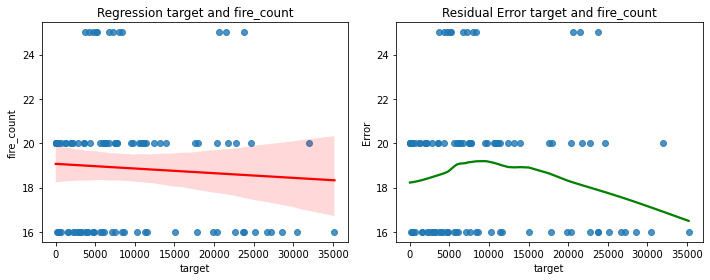

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_min
fire_min
Regression
slope:  -2.230882976299793e-05
intersept:  1.6348011896563297
r2:  -0.06520709896076417
P_value:  0.5213632010793854
std error:  3.466336914111699e-05


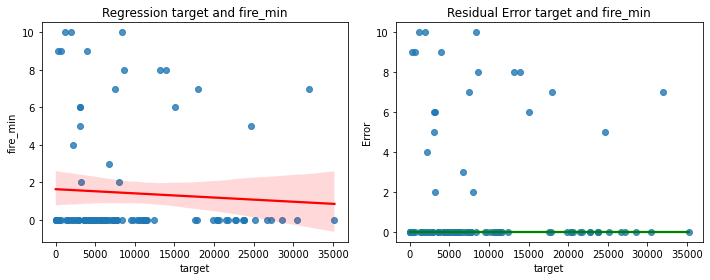

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_max
fire_max
Regression
slope:  1.0696186744291968e-05
intersept:  2.3434899838366445
r2:  0.02656056052561178
P_value:  0.7941203202507509
std error:  4.0874516645610986e-05


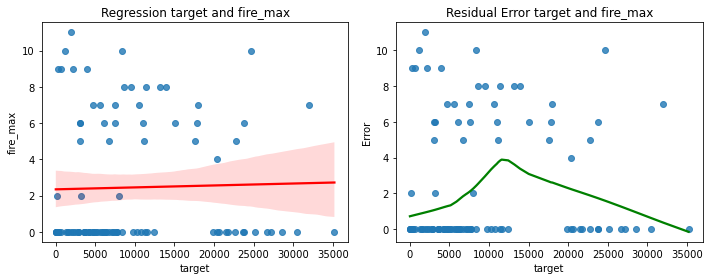

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_mean
fire_mean
Regression
slope:  4.1706116060234665e-06
intersept:  2.0334140442196085
r2:  0.011139842489758613
P_value:  0.9128569018441695
std error:  3.801087624556561e-05


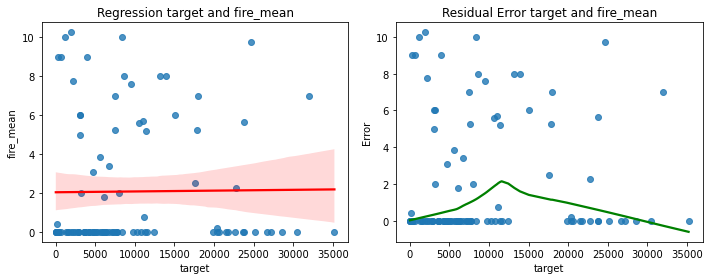

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_sum
fire_sum
Regression
slope:  0.00013477367279334456
intersept:  37.32391716006579
r2:  0.01927491227098163
P_value:  0.849806874474238
std error:  0.0007098165098550903


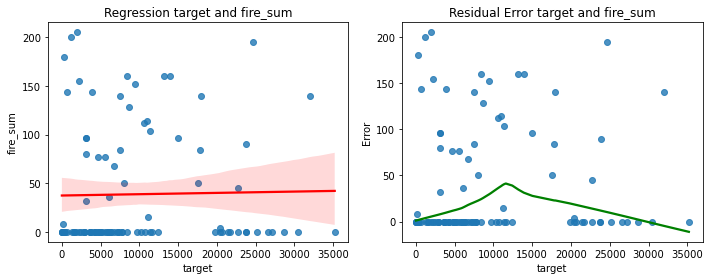

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_std
fire_std
Regression
slope:  8.244414571721354e-06
intersept:  0.30326804860177214
r2:  0.08045457219251592
P_value:  0.42857606728883946
std error:  1.0370819502444285e-05


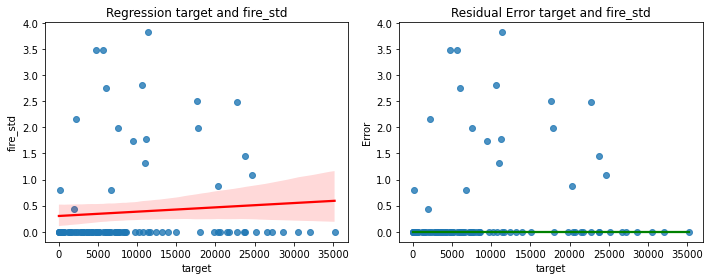

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_med
fire_med
Regression
slope:  3.4064782516048373e-06
intersept:  2.0638080280518563
r2:  0.008654872136472501
P_value:  0.9322432700952763
std error:  3.996159654671498e-05


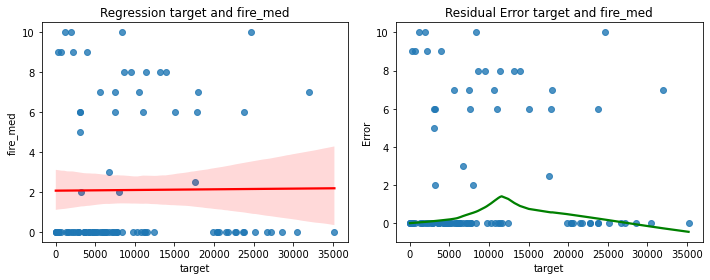

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_major
fire_major
Regression
slope:  6.687739507839355e-07
intersept:  2.0643949414329654
r2:  0.0016961020812252831
P_value:  0.9867065153443869
std error:  4.003509559191017e-05


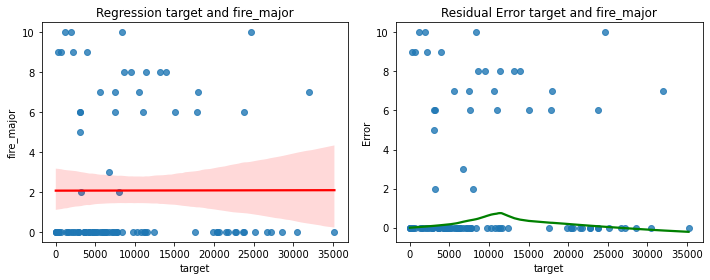

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_minor
fire_minor
Regression
slope:  -1.7756825571131688e-05
intersept:  1.9150700588222267
r2:  -0.049401986045283335
P_value:  0.62725255605825
std error:  3.645058014826835e-05


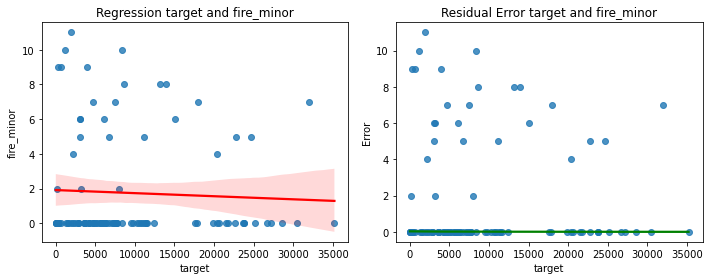

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
burnt_enco
burnt_enco
Regression
slope:  2.8958983694832875e-07
intersept:  0.29019603980969677
r2:  0.005520450229960246
P_value:  0.9567514440215025
std error:  5.326186048753078e-06


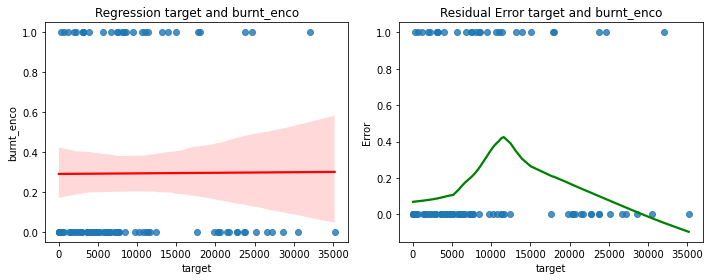

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_sn_ord
fire_sn_ord
Regression
slope:  7.687561309491222e-07
intersept:  0.46749167766817223
r2:  0.00851849419443933
P_value:  0.9333084664682241
std error:  9.162714099663677e-06


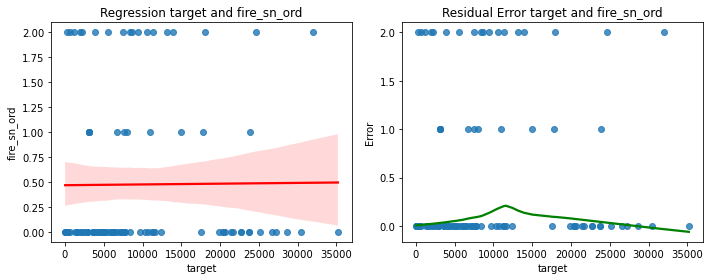

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_f
fire_f
Regression
slope:  -1.5245660155716639e-05
intersept:  0.8305901898736203
r2:  -0.16604127197461177
P_value:  0.10048002493267692
std error:  9.19334495615289e-06


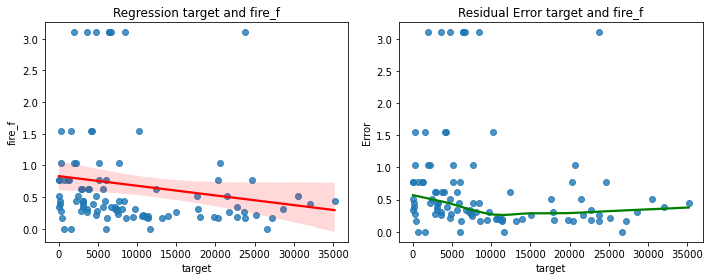

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_tot
fire_tot
Regression
slope:  0.00018371774145143293
intersept:  6.276106836690528
r2:  0.2859900048368234
P_value:  0.00410968025258135
std error:  6.250076279516202e-05


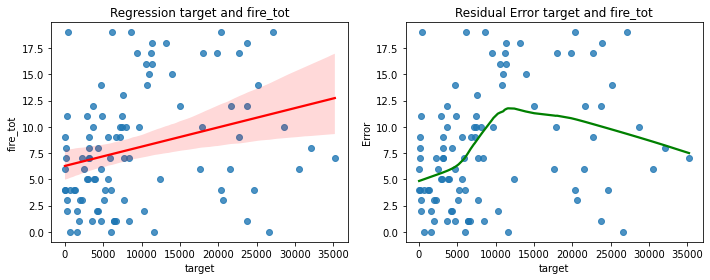

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
since_fire
since_fire
Regression
slope:  -9.140842363968537e-06
intersept:  4.995365469587698
r2:  -0.01338309564465299
P_value:  0.8953996965558416
std error:  6.934335890341406e-05


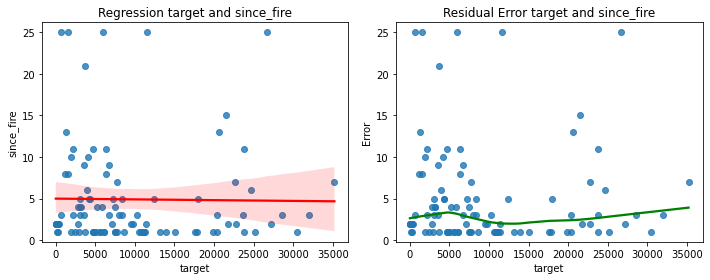

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_gap
fire_gap
Regression
slope:  -5.722817253576288e-05
intersept:  5.054618206273091
r2:  -0.14949653919407888
P_value:  0.13970410596063015
std error:  3.843127105588809e-05


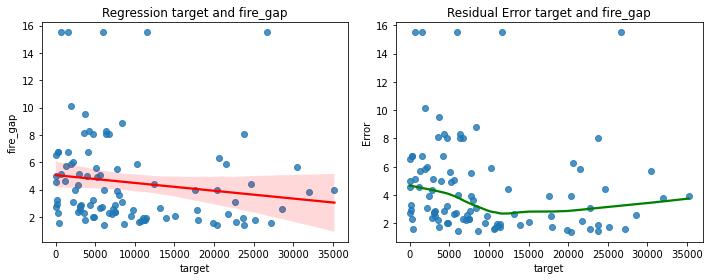

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_pois1_2
fire_pois1_2
Regression
slope:  0.00024009311812992753
intersept:  6.063854123000517
r2:  0.29389554520560596
P_value:  0.0031512694351577913
std error:  7.928388558347181e-05


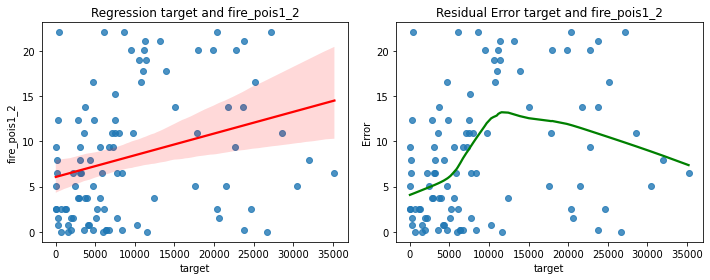

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_pois1_5
fire_pois1_5
Regression
slope:  0.0001062695697558433
intersept:  1.240252174949276
r2:  0.2833566111986654
P_value:  0.004482440486109941
std error:  3.651866818753048e-05


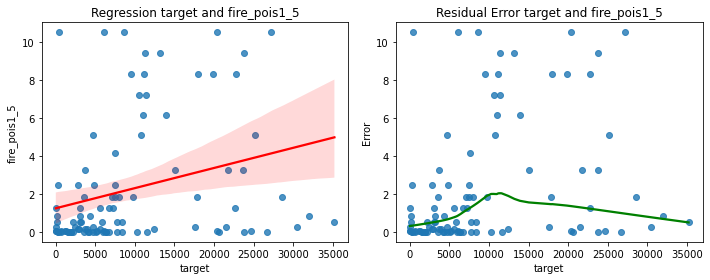

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
fire_pois1_10
fire_pois1_10
Regression
slope:  3.653344348595483e-05
intersept:  0.28989128079592863
r2:  0.2505394610564384
P_value:  0.012377164237338523
std error:  1.4333481448792771e-05


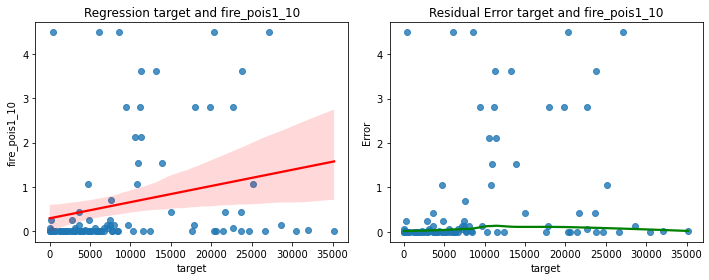

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_an_emsi_avg_si
tot_an_emsi_avg_si
Regression
slope:  -4.261951105418307e-05
intersept:  10.53369501132401
r2:  -0.3616791325310958
P_value:  0.00023479559122063494
std error:  1.1154652766172006e-05


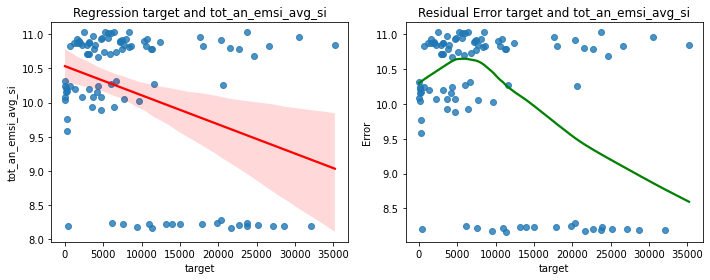

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_an_drsi_avg_si
tot_an_drsi_avg_si
Regression
slope:  -6.840223189005046e-05
intersept:  11.837560342808928
r2:  -0.5130942178827086
P_value:  5.6271910457464496e-08
std error:  1.1618304019518849e-05


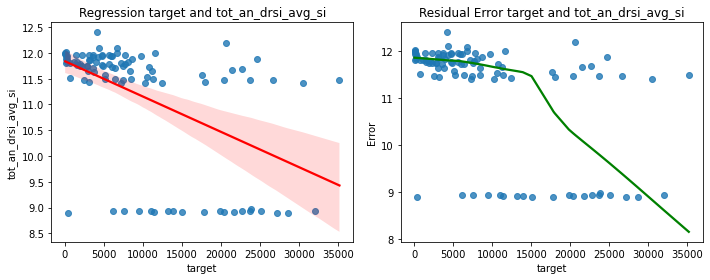

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_emse_djf
tot_avg_emse_djf
Regression
slope:  0.0035346311048910922
intersept:  338.62019246536556
r2:  0.45741371203480363
P_value:  1.938083288985156e-06
std error:  0.0006977098931918713


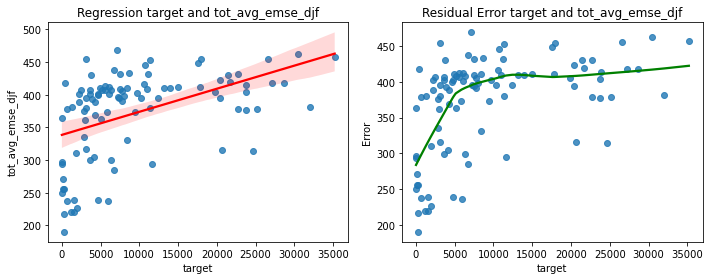

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_emse_mam
tot_avg_emse_mam
Regression
slope:  0.005035783947168449
intersept:  219.23813523315656
r2:  0.5869759304175254
P_value:  1.711178951199214e-10
std error:  0.0007052348734355768


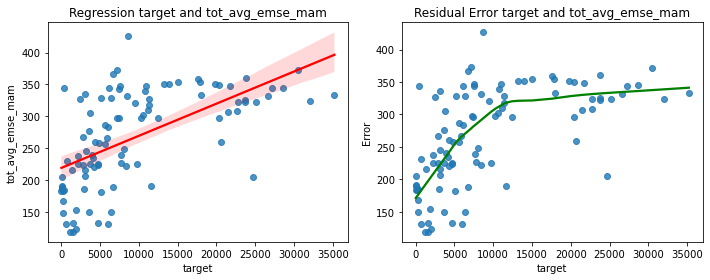

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_emse_jja
tot_avg_emse_jja
Regression
slope:  0.005362977494025798
intersept:  70.75249001642888
r2:  0.6012861739580759
P_value:  4.674507797904372e-11
std error:  0.0007236090908529729


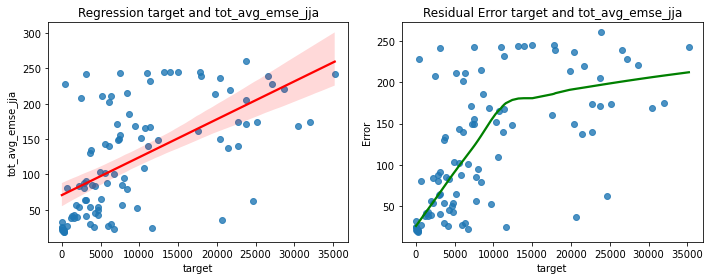

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_emse_son
tot_avg_emse_son
Regression
slope:  0.0009523131062246965
intersept:  210.95516045975722
r2:  0.06856619624434236
P_value:  0.5000857129722669
std error:  0.001406891319973629


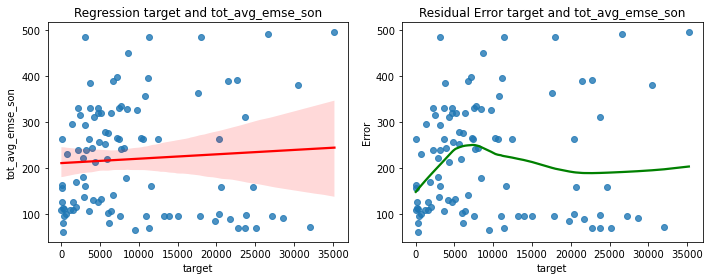

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_emse_dry
tot_avg_emse_dry
Regression
slope:  0.008779955376794003
intersept:  151.24677230535426
r2:  0.5860700286951094
P_value:  1.8537506525131435e-10
std error:  0.0012324847239233506


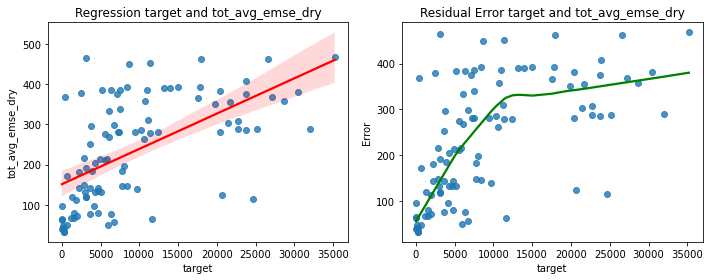

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_emse_wet
tot_avg_emse_wet
Regression
slope:  0.00314046760337149
intersept:  685.2434797757289
r2:  0.14373990979293128
P_value:  0.155778711330412
std error:  0.002195318673382043


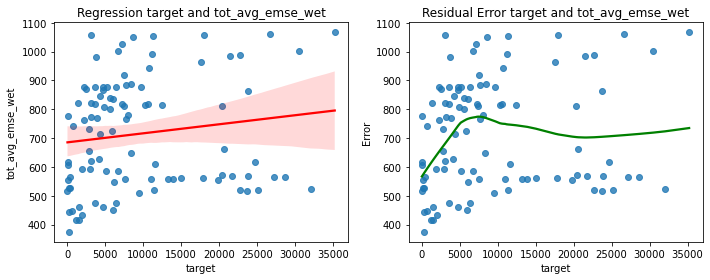

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_emse_annual
tot_avg_emse_annual
Regression
slope:  0.011920422980165478
intersept:  836.4902520810832
r2:  0.3725135690228922
P_value:  0.00014645808915820052
std error:  0.0030152560316682718


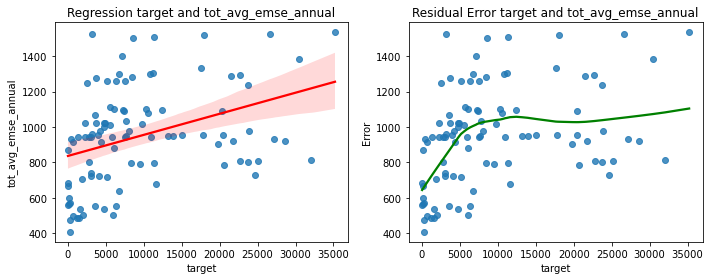

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_drse_djf
tot_avg_drse_djf
Regression
slope:  0.020645104297699664
intersept:  358.9481147931315
r2:  0.5795357939640079
P_value:  3.277970363378753e-10
std error:  0.0029476790903413225


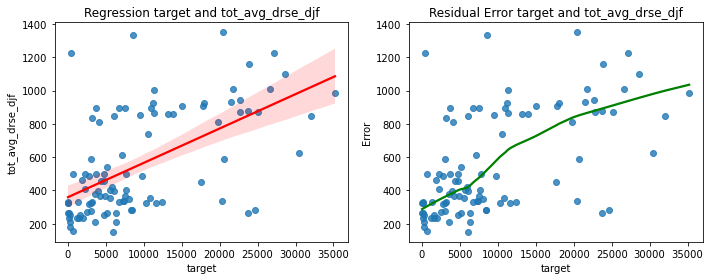

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_drse_mam
tot_avg_drse_mam
Regression
slope:  0.004534218645232564
intersept:  238.74885676908713
r2:  0.2935090568492368
P_value:  0.0031929944959066
std error:  0.0014994539092681202


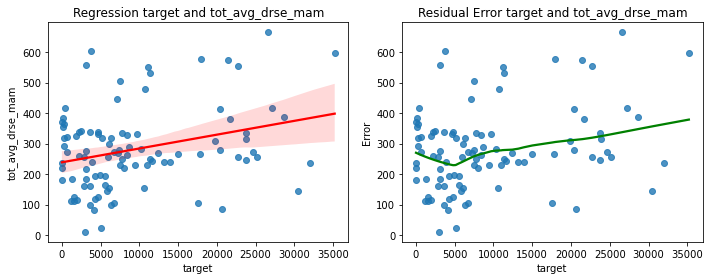

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_drse_jja
tot_avg_drse_jja
Regression
slope:  -1.8974711751685897e-05
intersept:  0.7639386443486214
r2:  -0.09036450168803928
P_value:  0.37372467354361505
std error:  2.12329831023175e-05


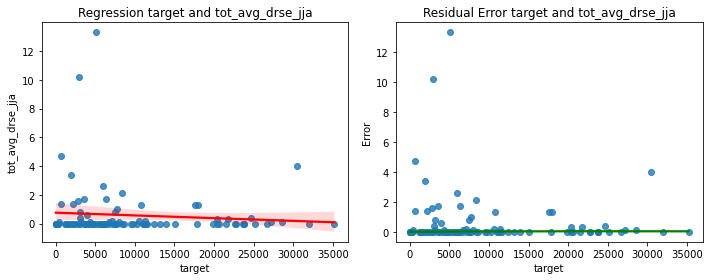

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_drse_son
tot_avg_drse_son
Regression
slope:  0.00061459848497204
intersept:  65.71889524249661
r2:  0.08216865180298923
P_value:  0.4187723079351625
std error:  0.0007568823448328941


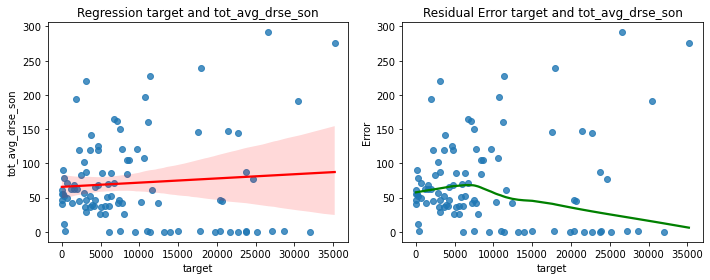

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_drse_dry
tot_avg_drse_dry
Regression
slope:  0.0009217892642569069
intersept:  7.652851426966377
r2:  0.2669795623289474
P_value:  0.007554706060410087
std error:  0.0003378396420700823


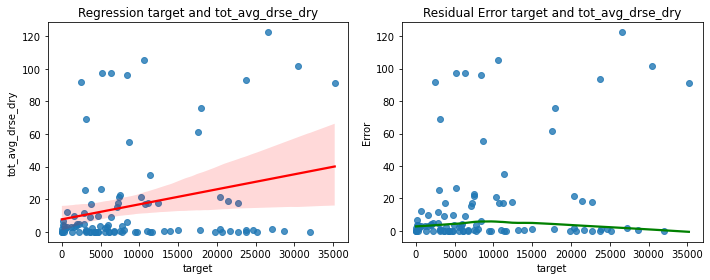

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_drse_wet
tot_avg_drse_wet
Regression
slope:  0.015154424619540023
intersept:  651.194863351164
r2:  0.41051178275563954
P_value:  2.4402848998649233e-05
std error:  0.003417856944651147


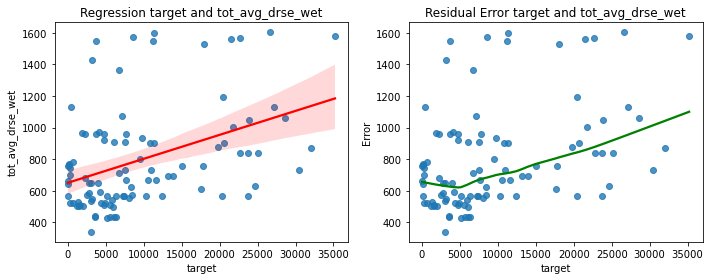

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tot_avg_drse_annual
tot_avg_drse_annual
Regression
slope:  0.016076213883796993
intersept:  658.8477147781294
r2:  0.42542821273708714
P_value:  1.1354006870992827e-05
std error:  0.003472293641441451


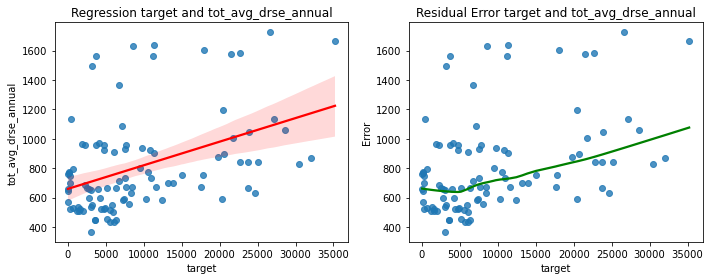

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
rain_d_mean
rain_d_mean
Regression
slope:  -5.9727195914754e-08
intersept:  0.002583928794176696
r2:  -0.03683074148856496
P_value:  0.717404377027083
std error:  1.6454361538367927e-07


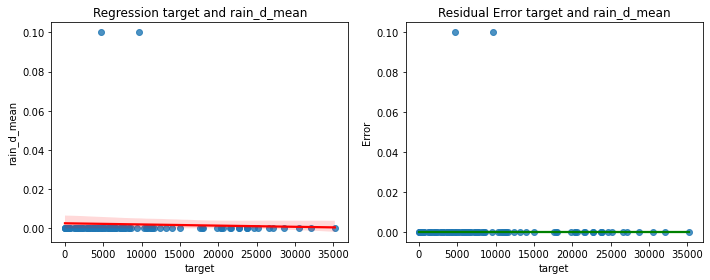

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
et_ma_mean
et_ma_mean
Regression
slope:  4.373413816642976e-05
intersept:  1.7720699466376522
r2:  0.22629554166279178
P_value:  0.024302109504189814
std error:  1.9113658930160603e-05


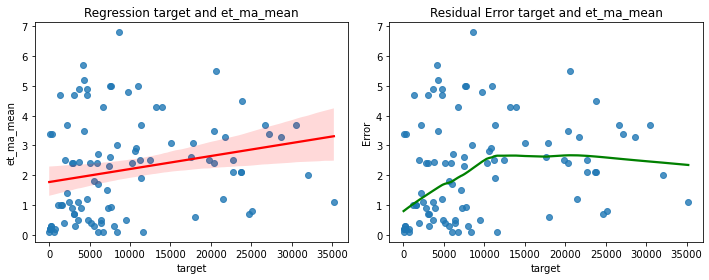

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tmax_mean
tmax_mean
Regression
slope:  6.277960081649677e-06
intersept:  31.0887261509641
r2:  0.01257183428528398
P_value:  0.9017076981515766
std error:  5.0699037202612014e-05


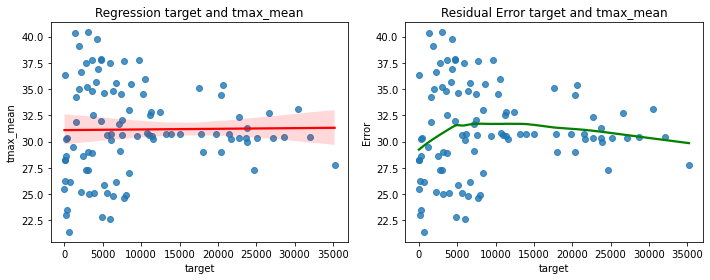

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
tmin_mean
tmin_mean
Regression
slope:  2.2187317399627356e-05
intersept:  15.308769930192039
r2:  0.03479217932203268
P_value:  0.7324375774926462
std error:  6.471042929379825e-05


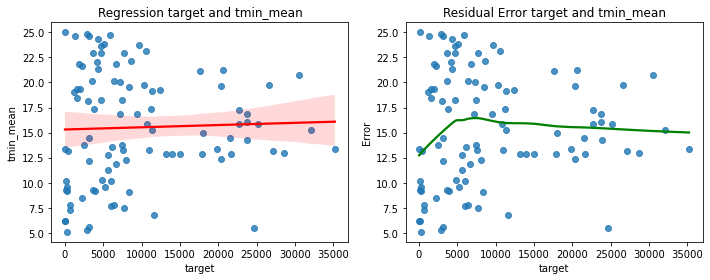

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
rh_tmax_mean
rh_tmax_mean
Regression
slope:  0.0011537280609888265
intersept:  3307.2324164452352
r2:  0.545000556345216
P_value:  5.467240932613551e-09
std error:  0.00018021477577246316


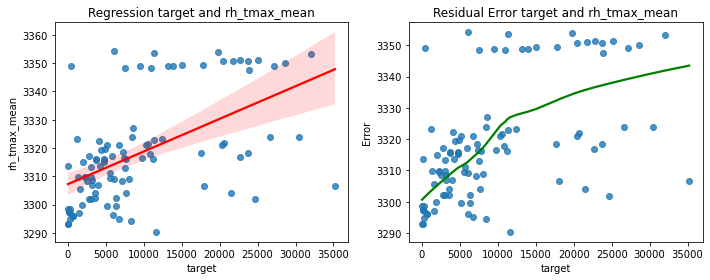

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
rh_tmin_mean
rh_tmin_mean
Regression
slope:  0.000798170480207773
intersept:  3354.573650411707
r2:  0.41743889175949384
P_value:  1.7182407434880006e-05
std error:  0.00017641674387379222


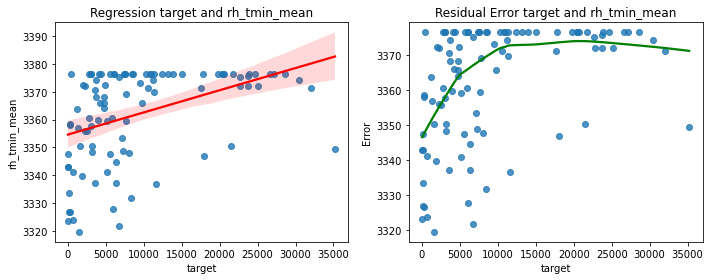

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_wfp_dry_mean
b1_wfp_dry_mean
Regression
slope:  0.0014260183327499429
intersept:  12.30513874726848
r2:  0.6532848868198262
P_value:  2.318283838098853e-13
std error:  0.00016780189639748565


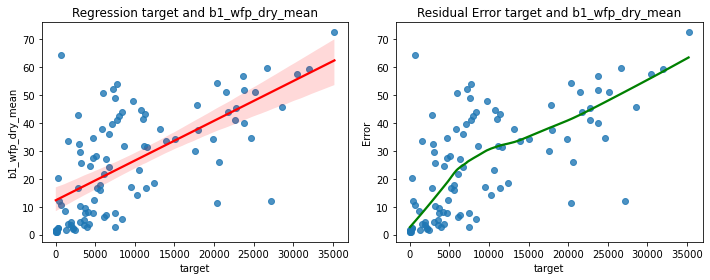

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_wfp_dry_p50
b1_wfp_dry_p50
Regression
slope:  0.0014497118719760023
intersept:  11.973663181983854
r2:  0.648684692512756
P_value:  3.864002751652822e-13
std error:  0.0001726949023281031


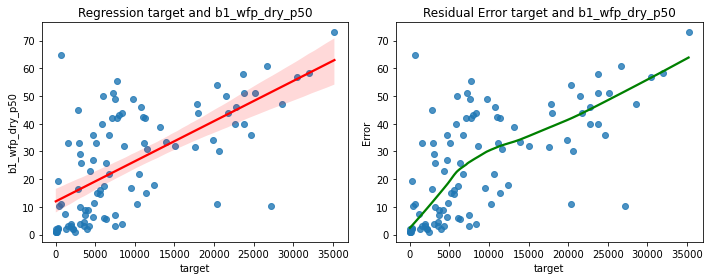

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_wfp_dry_p99
b1_wfp_dry_p99
Regression
slope:  0.001507326244973701
intersept:  18.56058506192252
r2:  0.6442604848688092
P_value:  6.264339877551469e-13
std error:  0.00018168173268987467


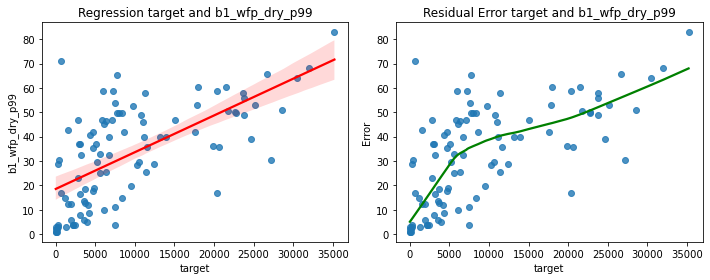

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_wdc_dry_major
b1_wdc_dry_major
Regression
slope:  6.222667981705474e-05
intersept:  1.574298358877024
r2:  0.6185457651577182
P_value:  8.948828103103524e-12
std error:  8.026064333497653e-06


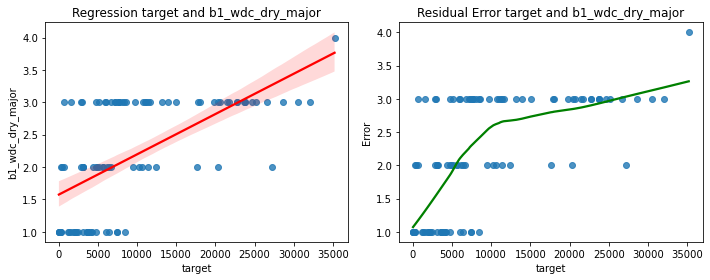

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_n17_dry_major
b1_n17_dry_major
Regression
slope:  -4.278674862120288e-05
intersept:  4.828079158910523
r2:  -0.13189323038973816
P_value:  0.19313953316407398
std error:  3.2650528530617134e-05


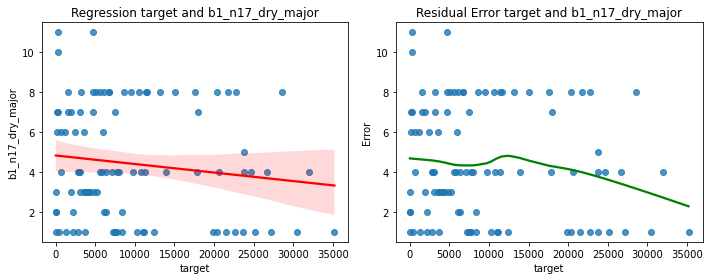

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_hsd_mean
b1_hsd_mean
Regression
slope:  8.951592206744972e-05
intersept:  102.09415098312971
r2:  0.6607944286003711
P_value:  9.877638639567573e-14
std error:  1.0323749968938864e-05


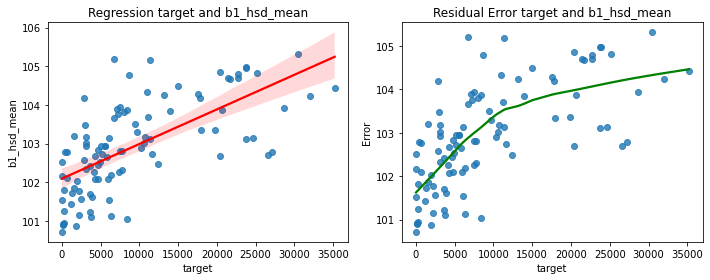

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_hsd_p50
b1_hsd_p50
Regression
slope:  8.748228518187258e-05
intersept:  102.10138162914238
r2:  0.6416836355209417
P_value:  8.270376925974851e-13
std error:  1.0616743967591308e-05


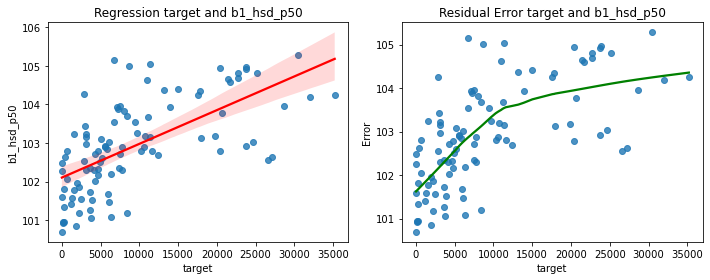

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_hsd_p99
b1_hsd_p99
Regression
slope:  0.00010061409316488516
intersept:  102.60532868138675
r2:  0.6704480480447641
P_value:  3.1809622283743345e-14
std error:  1.13054082624086e-05


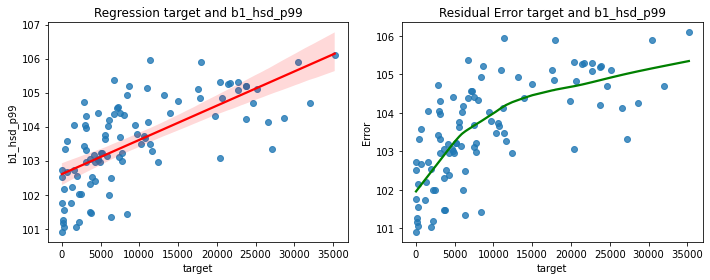

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_hmc_mean
b1_hmc_mean
Regression
slope:  0.00020915875530776003
intersept:  103.58181340658025
r2:  0.6709751171852738
P_value:  2.986497234935033e-14
std error:  2.3468380971137347e-05


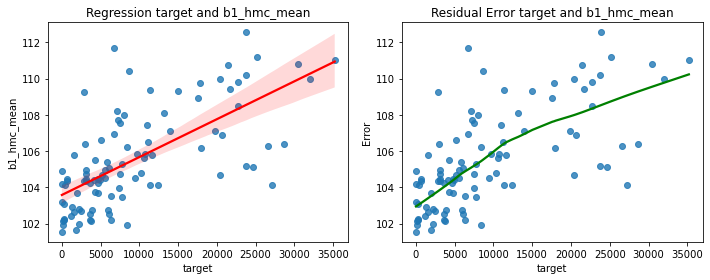

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_hmc_p50
b1_hmc_p50
Regression
slope:  0.00020625017395830216
intersept:  103.59007716138558
r2:  0.660626470847727
P_value:  1.007060069676731e-13
std error:  2.3797286838273564e-05


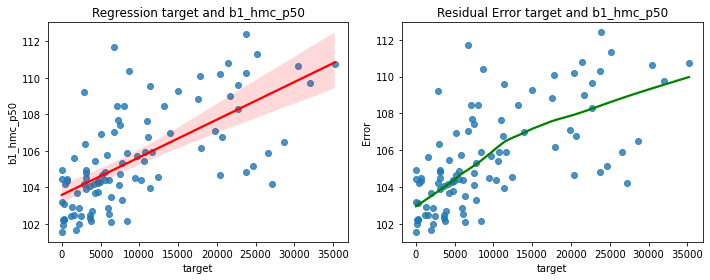

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_hmc_p99
b1_hmc_p99
Regression
slope:  0.0002499537754780321
intersept:  104.48080627411734
r2:  0.6851713943171507
P_value:  5.1957126015282016e-15
std error:  2.6979490448548592e-05


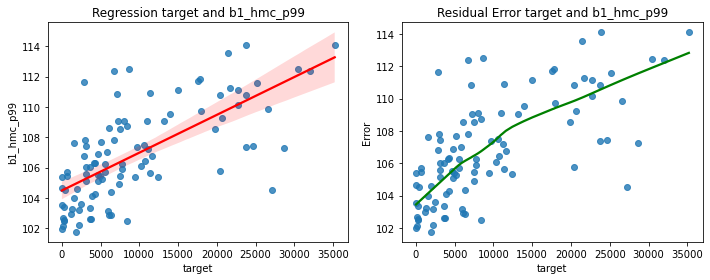

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_hcv_mean
b1_hcv_mean
Regression
slope:  5.5827703501600185e-06
intersept:  154.31120685113407
r2:  0.004949892131354544
P_value:  0.9612176686488063
std error:  0.00011451512219876383


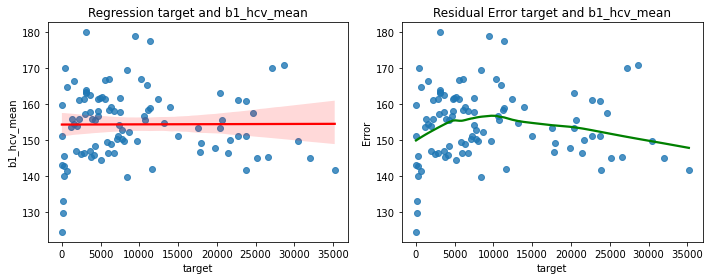

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_hcv_p50
b1_hcv_p50
Regression
slope:  -2.920495149222215e-06
intersept:  154.20743752470398
r2:  -0.0026000822726439713
P_value:  0.9796226719081331
std error:  0.00011404652682884909


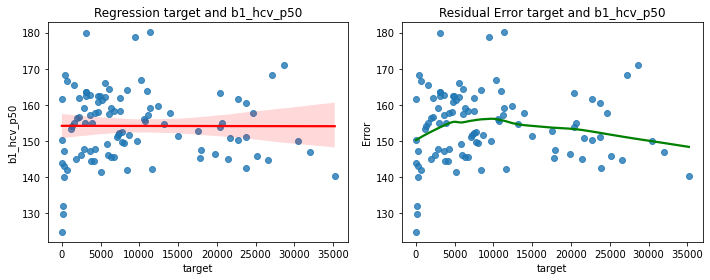

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_hcv_p99
b1_hcv_p99
Regression
slope:  6.851992868850508e-06
intersept:  162.20785883614337
r2:  0.004745713829225502
P_value:  0.9628162374686421
std error:  0.0001465968364109063


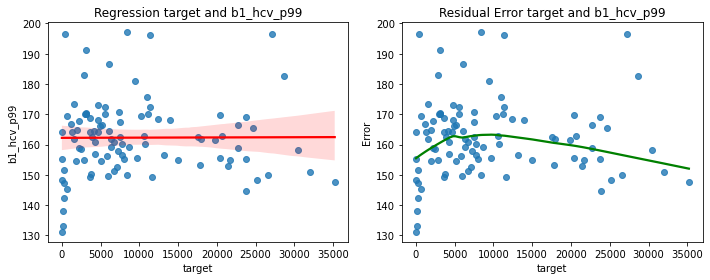

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_h99_mean
b1_h99_mean
Regression
slope:  0.00033165595702414367
intersept:  108.11830612742051
r2:  0.6593910243529859
P_value:  1.160634979935774e-13
std error:  3.839381928135395e-05


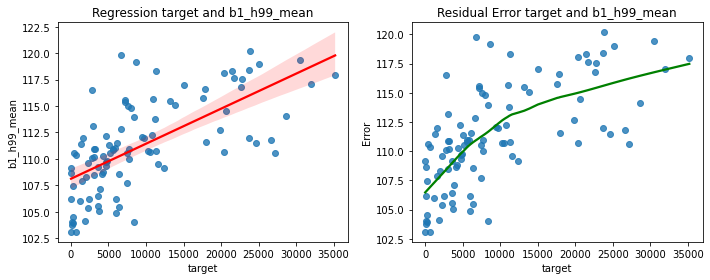

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_h99_p50
b1_h99_p50
Regression
slope:  0.0003246507480924515
intersept:  108.188532343933
r2:  0.6430217819109824
P_value:  7.161680985393905e-13
std error:  3.92597360482212e-05


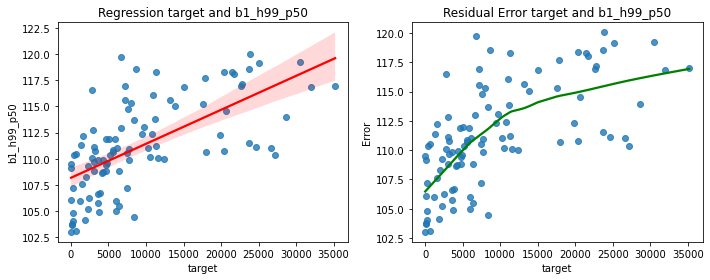

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_h99_p99
b1_h99_p99
Regression
slope:  0.00036567318217733475
intersept:  109.86923639081951
r2:  0.6585399393
P_value:  1.2793565655330631e-13
std error:  4.242853616966133e-05


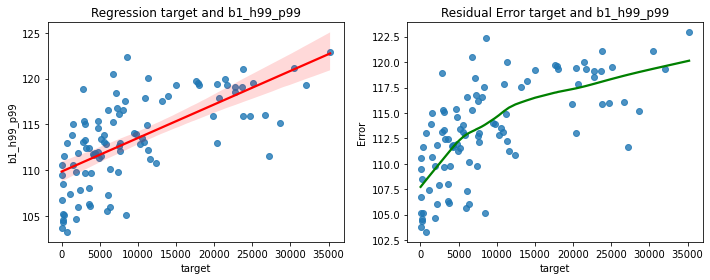

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_fdc_dry_major
b1_fdc_dry_major
Regression
slope:  4.835862448170502e-05
intersept:  1.887008238786256
r2:  0.5663732609540386
P_value:  9.95483651569701e-10
std error:  7.144814999852379e-06


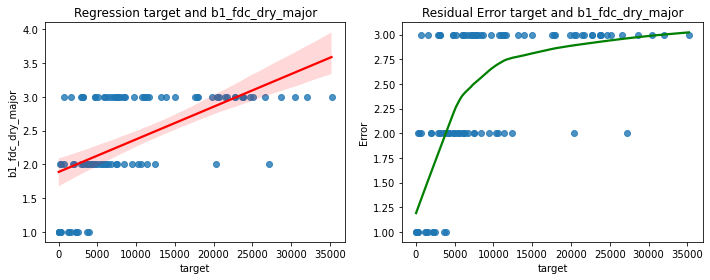

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_ccw_dry_mean
b1_ccw_dry_mean
Regression
slope:  0.001970059805679883
intersept:  20.741865304429613
r2:  0.6422002084959851
P_value:  7.824028915506798e-13
std error:  0.00023875704438793197


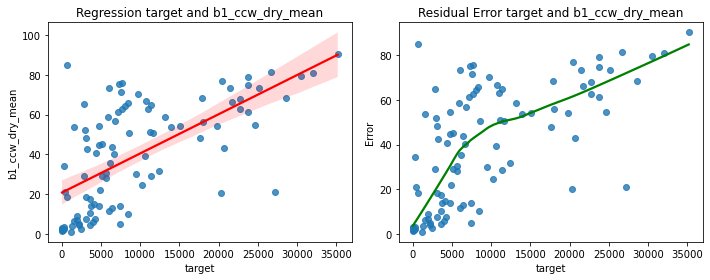

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_ccw_dry_p50
b1_ccw_dry_p50
Regression
slope:  0.0020172362473815267
intersept:  20.218173946310394
r2:  0.6399371122310873
P_value:  9.969019239660117e-13
std error:  0.0002459440816482293


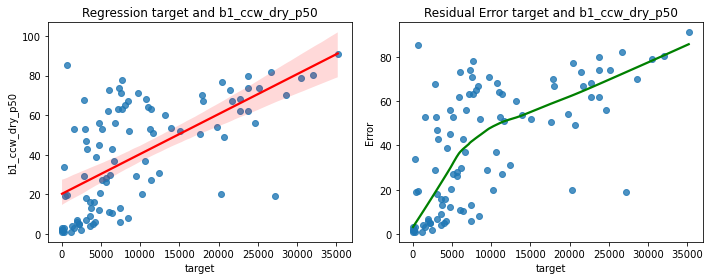

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_ccw_dry_p99
b1_ccw_dry_p99
Regression
slope:  0.001947831543020105
intersept:  30.247179922383864
r2:  0.6254373648395495
P_value:  4.494280674214507e-12
std error:  0.00024673402835711264


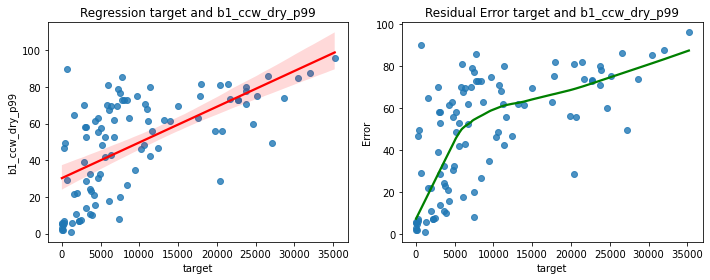

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.008796100831252136
intersept:  479.66624842437983
r2:  -0.6038040535954785
P_value:  3.6954889180698494e-11
std error:  0.001179068331926008


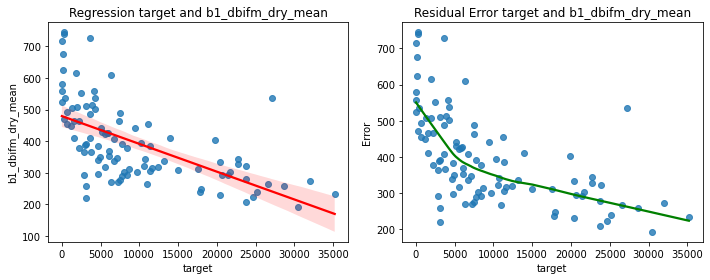

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.00031056795460360264
intersept:  13.819899202352396
r2:  -0.27763278507348815
P_value:  0.005398401422520025
std error:  0.0001091143983327121


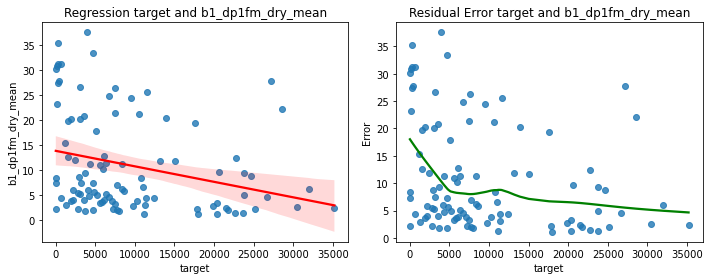

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_dp1fm_dry_p50
b1_dp1fm_dry_p50
Regression
slope:  -0.0003144998870334692
intersept:  13.85220152256364
r2:  -0.2730653728610374
P_value:  0.00624491766344866
std error:  0.00011249702214839933


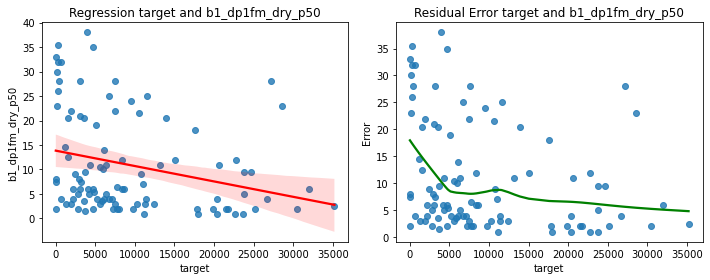

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_dp1fm_dry_p99
b1_dp1fm_dry_p99
Regression
slope:  -0.00040376538362108617
intersept:  18.470074946016496
r2:  -0.3104379432507286
P_value:  0.0017645886215648758
std error:  0.0001255345660887472


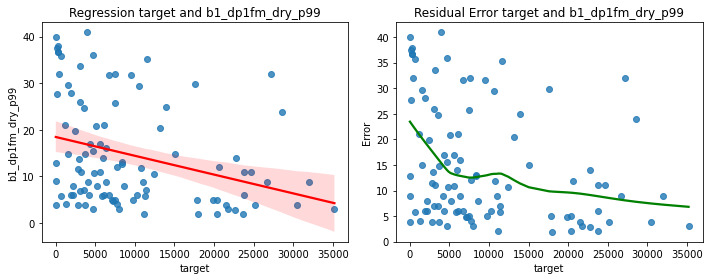

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.0012215784812614836
intersept:  17.055790328659775
r2:  0.6554260915073117
P_value:  1.8221610310380724e-13
std error:  0.00014292489215562108


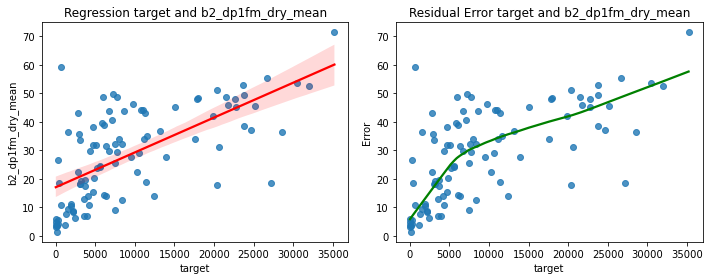

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b2_dp1fm_dry_p50
b2_dp1fm_dry_p50
Regression
slope:  0.0012338361823039678
intersept:  16.91521605006265
r2:  0.6539216786811035
P_value:  2.1585013194529976e-13
std error:  0.00014494077095460607


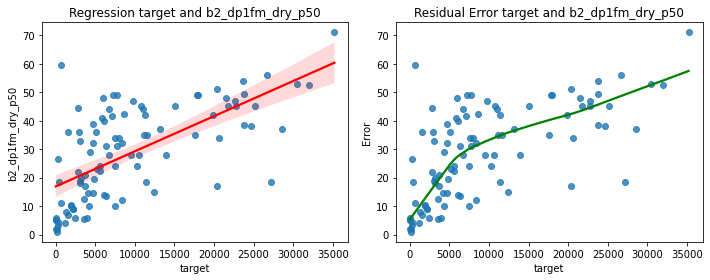

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b2_dp1fm_dry_p95
b2_dp1fm_dry_p95
Regression
slope:  0.001170657881438526
intersept:  22.294343877622772
r2:  0.625021561114984
P_value:  4.68722398183777e-12
std error:  0.00014845055961873875


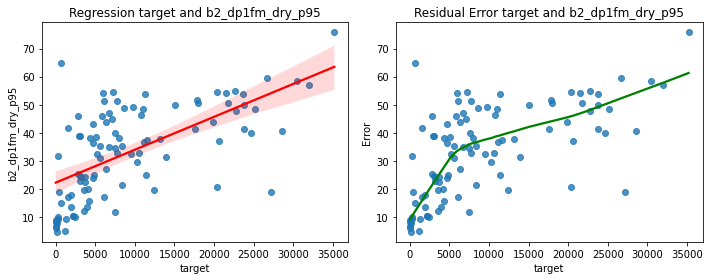

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.0009130199405794475
intersept:  67.66357126192518
r2:  -0.5255577552588891
P_value:  2.3289747810997367e-08
std error:  0.00015006518556291316


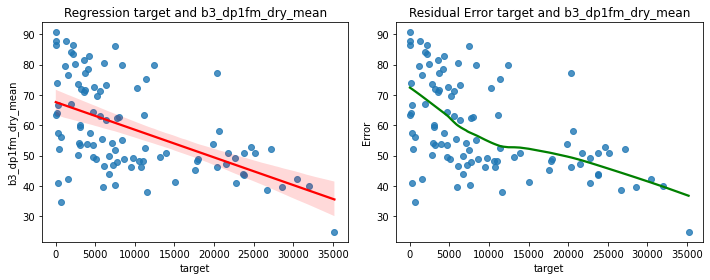

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b3_dp1fm_dry_p50
b3_dp1fm_dry_p50
Regression
slope:  -0.0009203320770658127
intersept:  67.70662743903813
r2:  -0.520199197709449
P_value:  3.418000035161194e-08
std error:  0.0001534156796283818


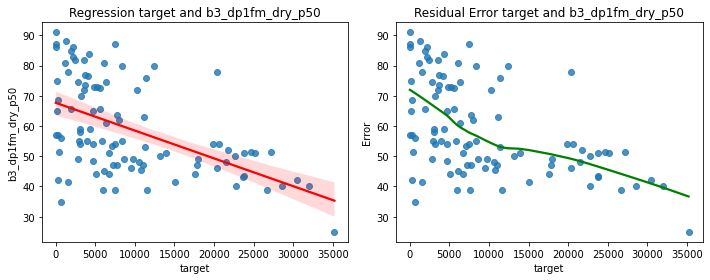

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b3_dp1fm_dry_p99
b3_dp1fm_dry_p99
Regression
slope:  -0.0010049330549566269
intersept:  74.45734414289582
r2:  -0.573550033636306
P_value:  5.465570314225893e-10
std error:  0.0001457317819828961


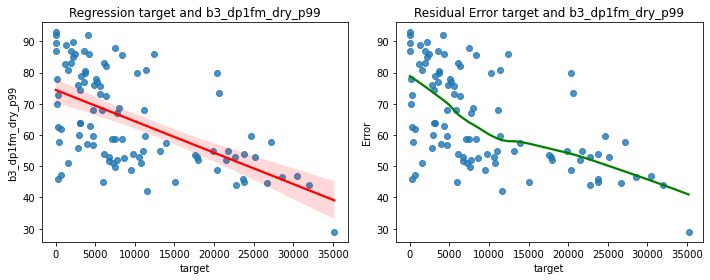

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_dbifm_dry_p50
b1_dbifm_dry_p50
Regression
slope:  -0.008547604572873112
intersept:  476.06930808116516
r2:  -0.5893037015592285
P_value:  1.3915371271337367e-10
std error:  0.0011898253793987232


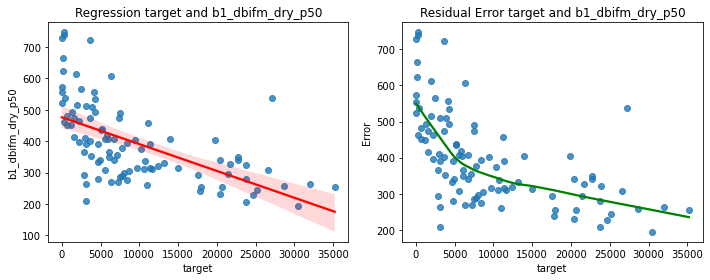

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b1_dbifm_dry_p99
b1_dbifm_dry_p99
Regression
slope:  -0.009139676025818114
intersept:  541.556077430025
r2:  -0.6028063157443032
P_value:  4.057163380602512e-11
std error:  0.0012283123831879504


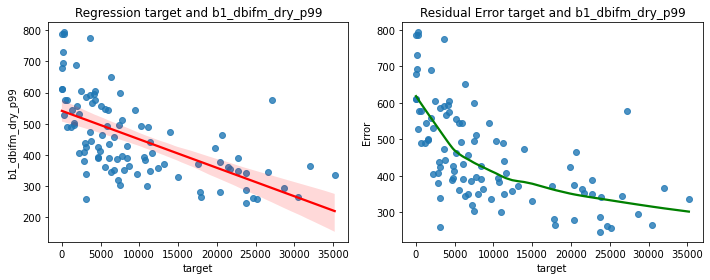

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.013672385408261182
intersept:  795.0422994889532
r2:  -0.634721841576995
P_value:  1.7292143901396997e-12
std error:  0.0016900858541325909


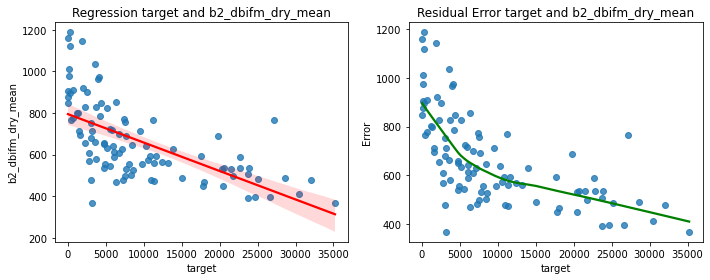

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b2_dbifm_dry_p50
b2_dbifm_dry_p50
Regression
slope:  -0.013815957327892833
intersept:  795.3242207681258
r2:  -0.637430152911033
P_value:  1.3007697999722773e-12
std error:  0.0016956637899191043


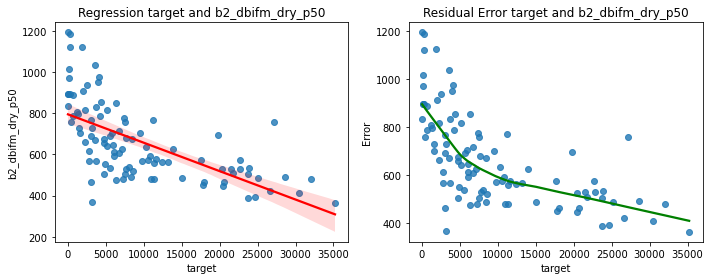

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b2_dbifm_dry_p99
b2_dbifm_dry_p99
Regression
slope:  -0.014518350279338791
intersept:  873.9708299888817
r2:  -0.636787179776064
P_value:  1.392085242379767e-12
std error:  0.0017848995655925111


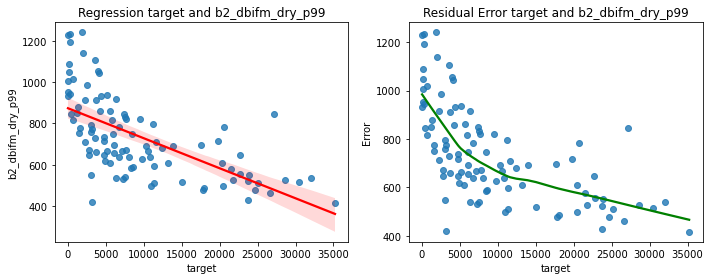

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.02266114392696902
intersept:  1143.62743959477
r2:  -0.6581317603340783
P_value:  1.340381598429648e-13
std error:  0.002632218936796037


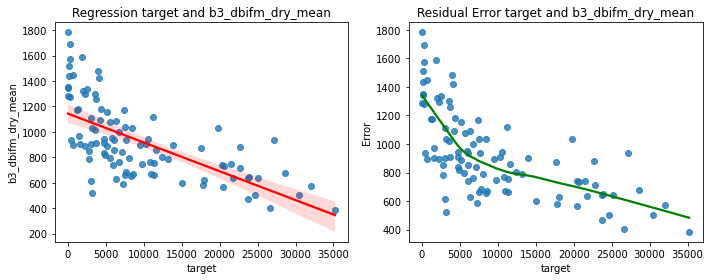

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b3_dbifm_dry_p50
b3_dbifm_dry_p50
Regression
slope:  -0.022796615941053238
intersept:  1143.7636770430738
r2:  -0.6591892803029663
P_value:  1.187774342373869e-13
std error:  0.0026404562074976976


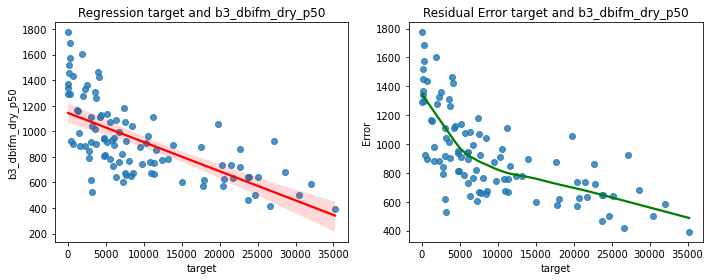

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b3_dbifm_dry_p99
b3_dbifm_dry_p99
Regression
slope:  -0.023729840389634552
intersept:  1258.6672398503642
r2:  -0.6565503282999117
P_value:  1.6045001084597522e-13
std error:  0.0027680555242986763


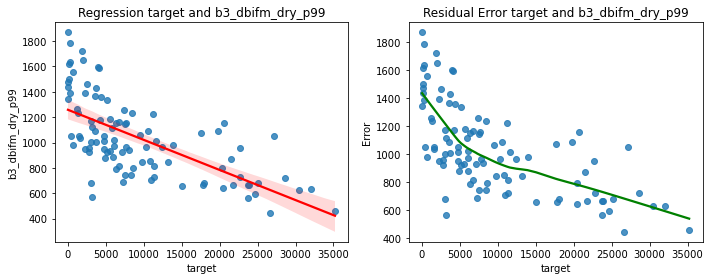

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b4_dbifm_dry_mean
b4_dbifm_dry_mean
Regression
slope:  -0.0032833959387802785
intersept:  2120.2485708275926
r2:  -0.09169631296150306
P_value:  0.36669405389203025
std error:  0.0036203618222951216


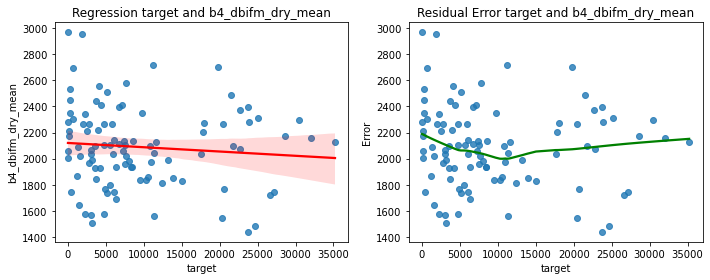

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b4_dbifm_dry_p50
b4_dbifm_dry_p50
Regression
slope:  -0.0036929313704952885
intersept:  2119.3956195936416
r2:  -0.10210821424600758
P_value:  0.31456354533507214
std error:  0.0036529927274147325


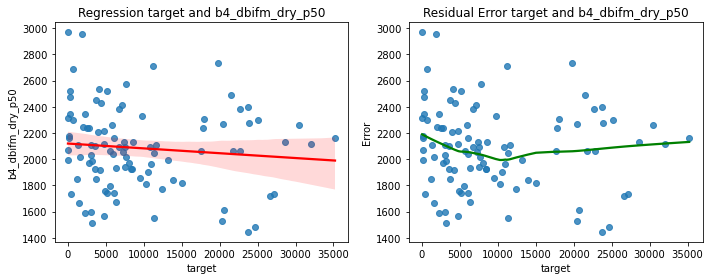

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b4_dbifm_dry_p99
b4_dbifm_dry_p99
Regression
slope:  -0.0014914575832371386
intersept:  2228.753479180488
r2:  -0.03936725270668298
P_value:  0.698849058270274
std error:  0.0038437323581116743


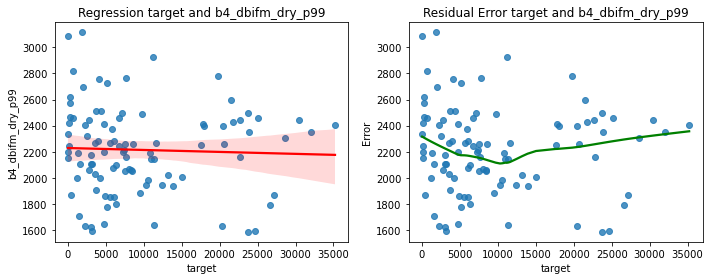

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.035341998270511696
intersept:  2709.43301513373
r2:  -0.6511778403321565
P_value:  2.932670958360432e-13
std error:  0.0041821979055866485


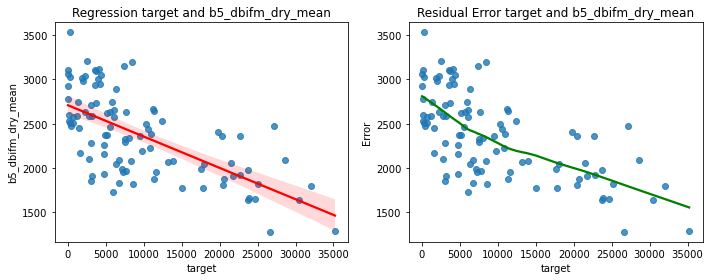

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b5_dbifm_dry_p50
b5_dbifm_dry_p50
Regression
slope:  -0.03548531432082181
intersept:  2703.948422099547
r2:  -0.6512653336960891
P_value:  2.904288915833304e-13
std error:  0.004198177724284405


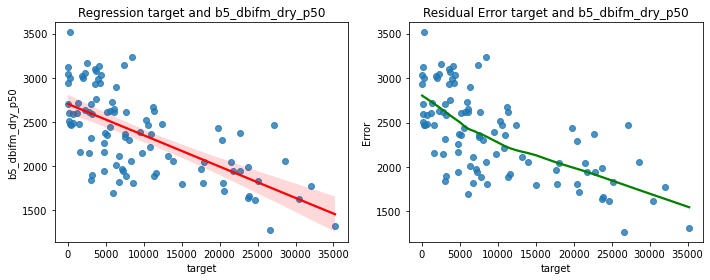

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b5_dbifm_dry_p99
b5_dbifm_dry_p99
Regression
slope:  -0.03470540428310875
intersept:  2888.0880575040405
r2:  -0.6306601534721973
P_value:  2.636484285928573e-12
std error:  0.004336213530555952


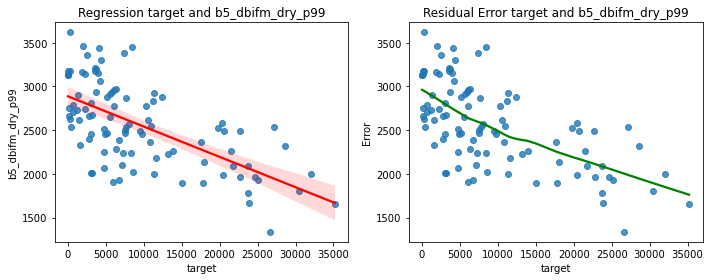

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.032774091868775675
intersept:  1800.6311649382487
r2:  -0.6319835539383352
P_value:  2.2995181731523645e-12
std error:  0.0040806610742824


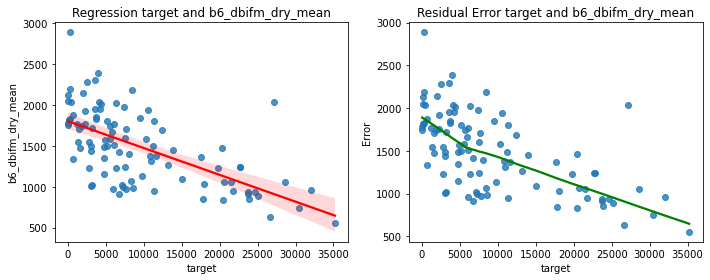

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b6_dbifm_dry_p50
b6_dbifm_dry_p50
Regression
slope:  -0.03308307797754277
intersept:  1803.6590891854353
r2:  -0.6315239681906696
P_value:  2.4115327815715153e-12
std error:  0.004124122477715854


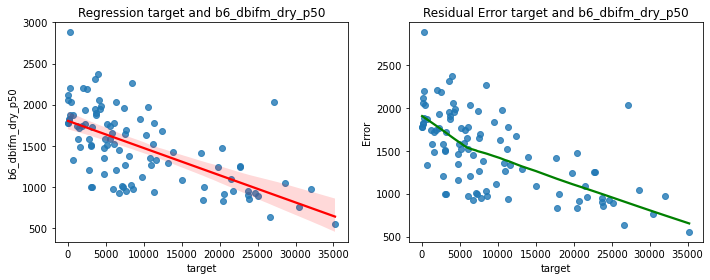

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
b6_dbifm_dry_p99
b6_dbifm_dry_p99
Regression
slope:  -0.033919064830155984
intersept:  1975.6748885610996
r2:  -0.6301746363067133
P_value:  2.7716735238354412e-12
std error:  0.004243385575939751


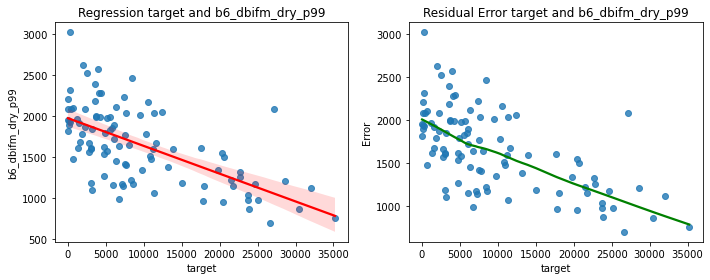

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r32
dbifmdry_r32
Regression
slope:  -66.49800902811872
intersept:  14451779.41803447
r2:  -0.4904683440160529
P_value:  2.5578403742320176e-07
std error:  11.996615977028563


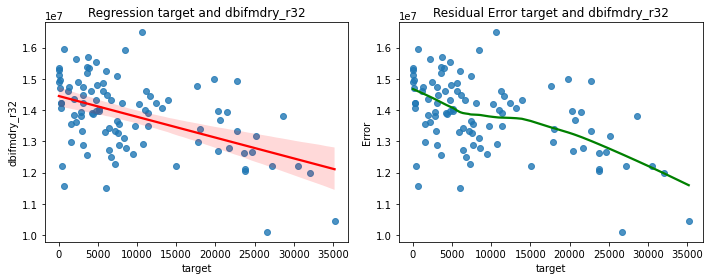

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r42
dbifmdry_r42
Regression
slope:  679.2707976806536
intersept:  26806990.948945593
r2:  0.7002207275177739
P_value:  7.28008051004735e-16
std error:  70.31946675394227


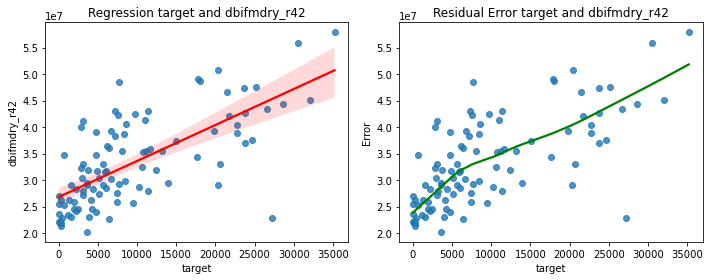

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r43
dbifmdry_r43
Regression
slope:  655.0916461254432
intersept:  18289631.96950919
r2:  0.7301133690593713
P_value:  9.981470003898522e-18
std error:  62.25207905018393


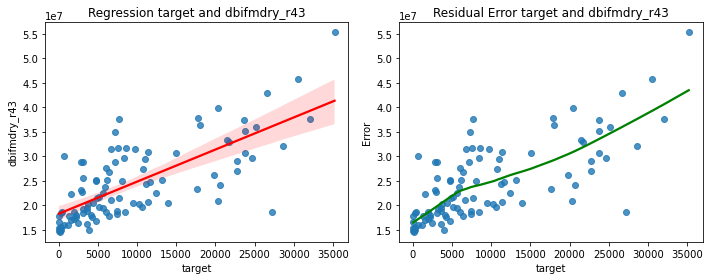

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r52
dbifmdry_r52
Regression
slope:  160.39504272472908
intersept:  35233140.508792825
r2:  0.2372846351942396
P_value:  0.018037478573125383
std error:  66.67323298370519


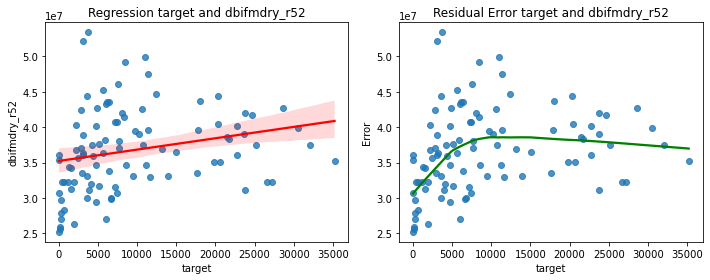

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r53
dbifmdry_r53
Regression
slope:  255.46835387881848
intersept:  24331010.1439567
r2:  0.48977438360971437
P_value:  2.6748641127915747e-07
std error:  46.17389983053677


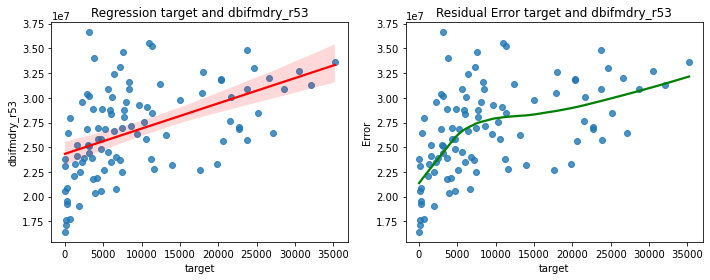

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r54
dbifmdry_r54
Regression
slope:  -149.46692371120054
intersept:  12956440.47540831
r2:  -0.5174773886613446
P_value:  4.142881319606908e-08
std error:  25.095034672146337


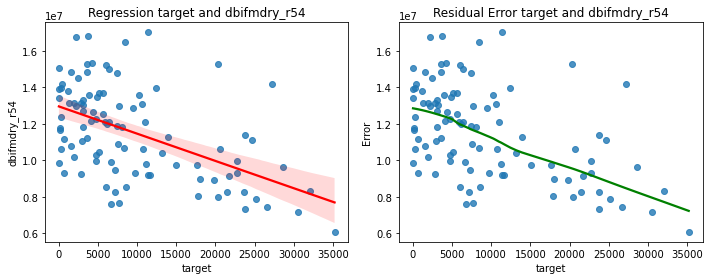

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r62
dbifmdry_r62
Regression
slope:  -87.3090136478868
intersept:  23320257.14029819
r2:  -0.18683607323687645
P_value:  0.06406500964217128
std error:  46.6119106084485


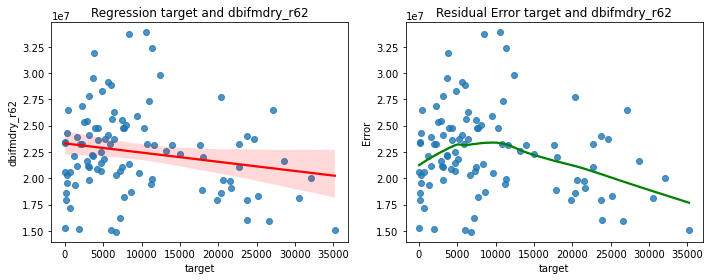

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r63
dbifmdry_r63
Regression
slope:  12.148651073866827
intersept:  16168302.183484571
r2:  0.04030430118511905
P_value:  0.6920381428677337
std error:  30.58002015063278


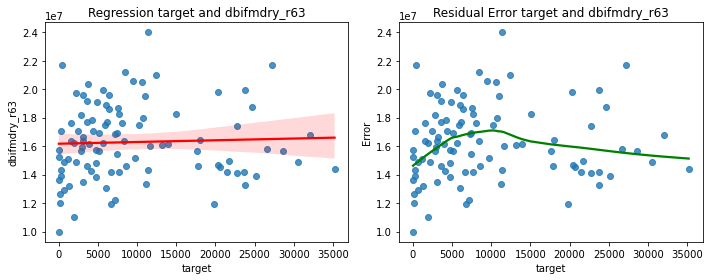

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r64
dbifmdry_r64
Regression
slope:  -141.95877698490324
intersept:  8616991.378981626
r2:  -0.5261123931560003
P_value:  2.2374581861991402e-08
std error:  23.298544187749478


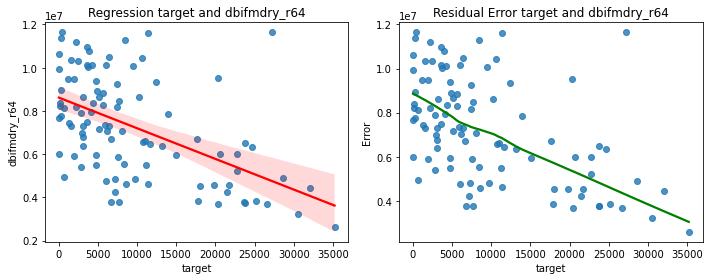

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_r65
dbifmdry_r65
Regression
slope:  -52.501734946091595
intersept:  6665842.88869401
r2:  -0.49334714427387194
P_value:  2.122355590697596e-07
std error:  9.398765297085944


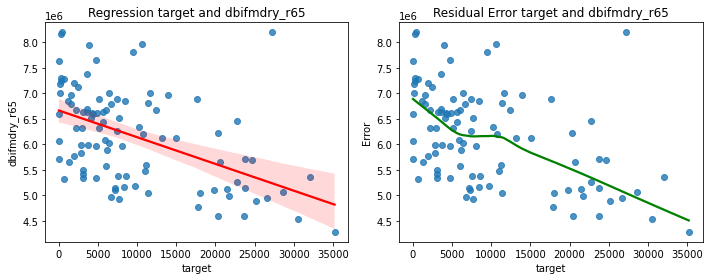

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_GSAVI
dbifmdry_GSAVI
Regression
slope:  25.86108784784711
intersept:  2501962.7239364134
r2:  0.4680790732008828
P_value:  1.0318005196209364e-06
std error:  4.957240161998091


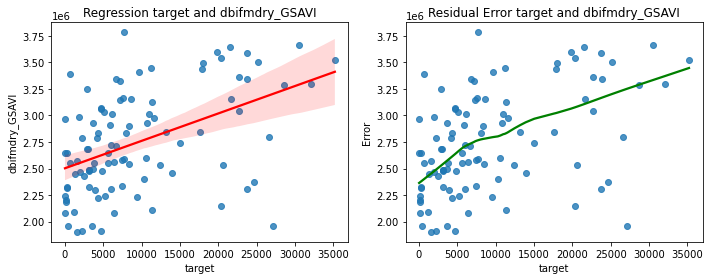

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_GNDVI
dbifmdry_GNDVI
Regression
slope:  67.49818963548722
intersept:  4568570.881012414
r2:  0.6629254654088385
P_value:  7.719324756936567e-14
std error:  7.739999261552641


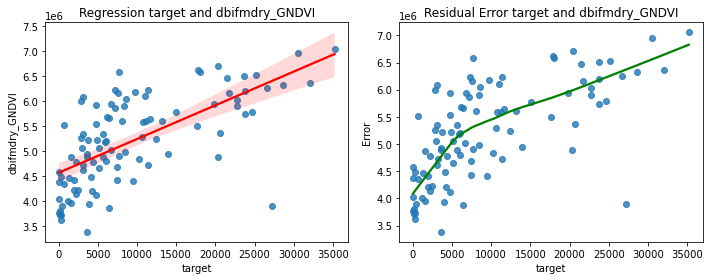

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_CVI
dbifmdry_CVI
Regression
slope:  669.277316470568
intersept:  39183741.80965999
r2:  0.5780452287763125
P_value:  3.726609285457658e-10
std error:  95.9292595219897


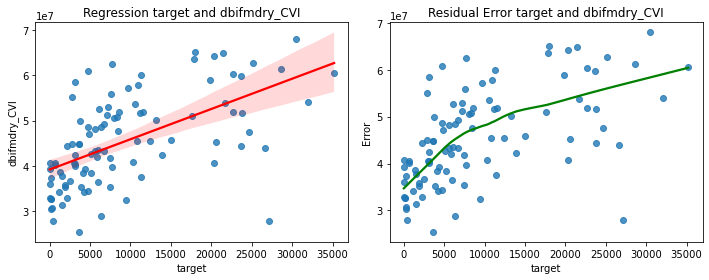

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_NDGI
dbifmdry_NDGI
Regression
slope:  24.725869865823565
intersept:  -1818264.6397210802
r2:  0.4997539218180763
P_value:  1.3923205898601434e-07
std error:  4.351223091212854


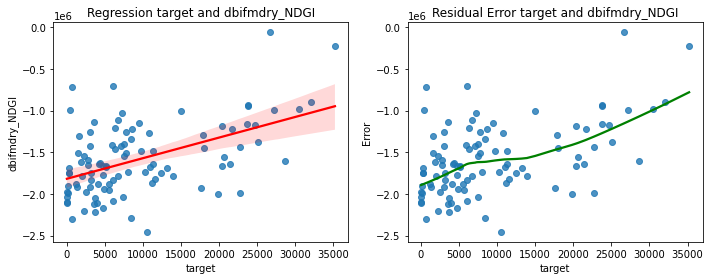

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_RI
dbifmdry_RI
Regression
slope:  -24.725869865823565
intersept:  1818264.6397210802
r2:  -0.4997539218180763
P_value:  1.3923205898601434e-07
std error:  4.351223091212854


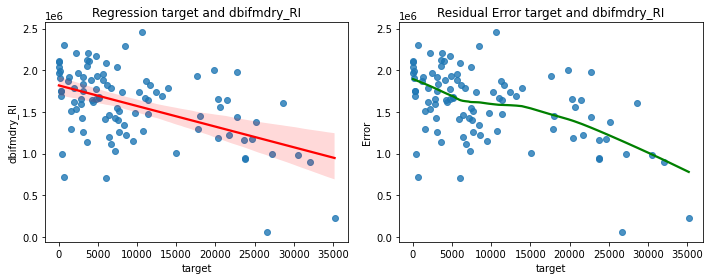

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_NBR
dbifmdry_NBR
Regression
slope:  107.31386546293331
intersept:  781905.6755632386
r2:  0.5725014357344624
P_value:  5.971363898751606e-10
std error:  15.604729572101082


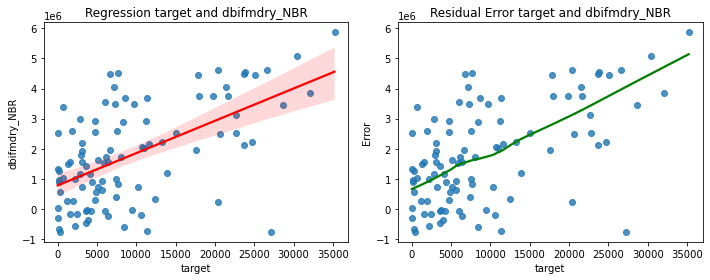

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_NDII
dbifmdry_NDII
Regression
slope:  71.4145544538979
intersept:  -1263620.6141910278
r2:  0.5581536610667754
P_value:  1.9441114210443754e-09
std error:  10.779232981056287


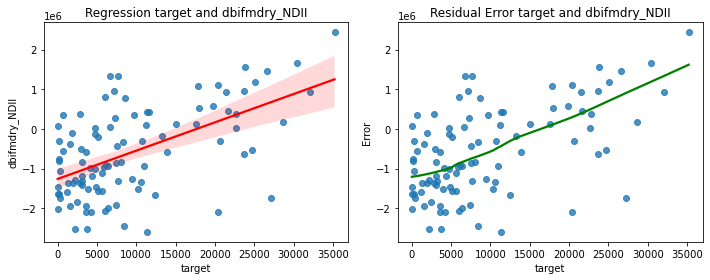

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_GDVI
dbifmdry_GDVI
Regression
slope:  10.384359225333883
intersept:  1325281.6090520343
r2:  0.32240646132407286
P_value:  0.0011358081380796014
std error:  3.095688176880908


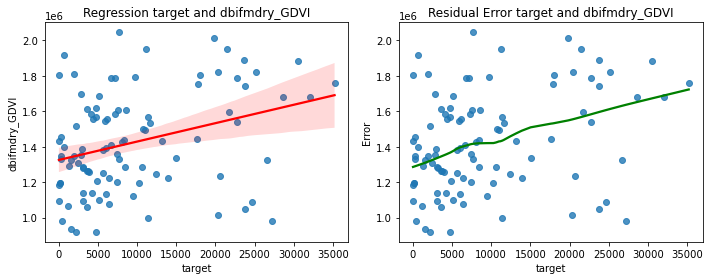

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_MSAVI
dbifmdry_MSAVI
Regression
slope:  39.08785137006239
intersept:  1534802.4556807657
r2:  0.5943154063785945
P_value:  8.865700252237276e-11
std error:  5.370569257773518


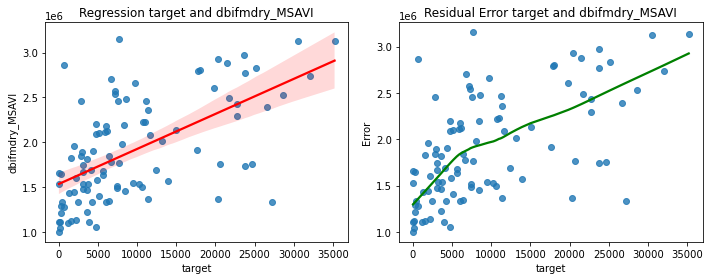

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_DVI
dbifmdry_DVI
Regression
slope:  19.37542802045282
intersept:  976673.1906618875
r2:  0.5209348061097933
P_value:  3.243924948823682e-08
std error:  3.2235519317127017


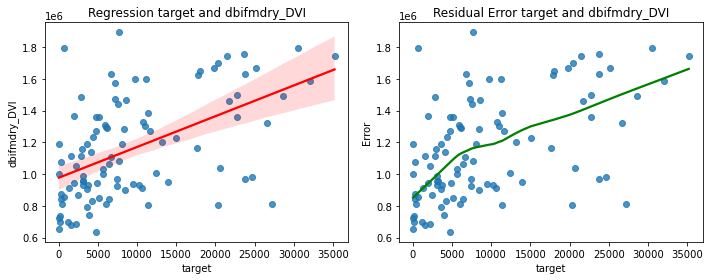

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_SAVI
dbifmdry_SAVI
Regression
slope:  43.08353828911171
intersept:  1769140.2697373168
r2:  0.6135853631594848
P_value:  1.4540445060311227e-11
std error:  5.6295445707527865


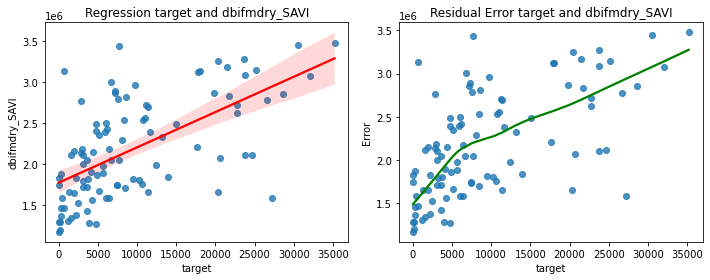

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_NDVI
dbifmdry_NDVI
Regression
slope:  97.4242474149827
intersept:  3017456.975741376
r2:  0.7042720935572148
P_value:  4.200090462824132e-16
std error:  9.971404477679043


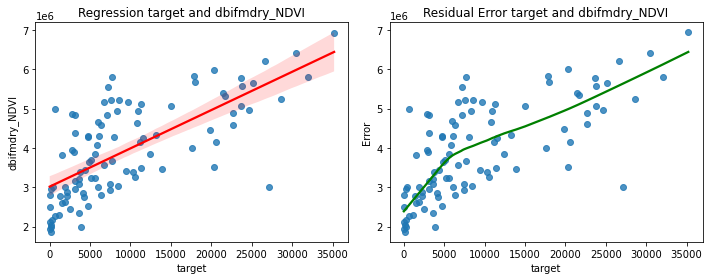

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518
dbifmdry_MSR
dbifmdry_MSR
Regression
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518


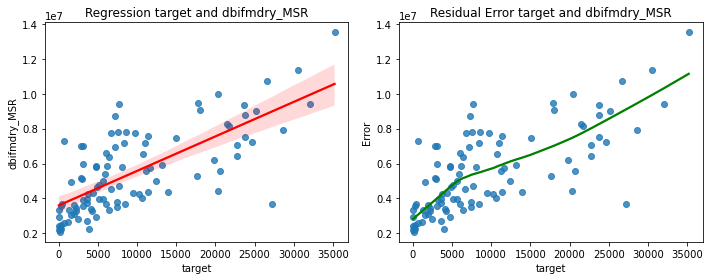

--------------------------------------------------
Residuals
slope:  198.00930156855665
intersept:  3597610.160148859
r2:  0.7252242050879915
P_value:  2.091980990376492e-17
std error:  19.087077720731518


In [82]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

### Split off unseen data

In [83]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = df_ml.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = df_ml.drop(unseen_data.index)

In [84]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(55, 111) (55,)
(24, 111) (24,)


### Plot up Histograms for train and test datasets

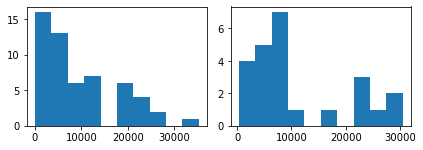

In [85]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [86]:
print(xdata1)

     fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  fire_med  \
1         16.00     10.00     10.00      10.00    160.00      0.00     10.00   
4         16.00      5.00      5.00       5.00     80.00      0.00      5.00   
9         20.00      0.00      0.00       0.00      0.00      0.00      0.00   
17        20.00      0.00      0.00       0.00      0.00      0.00      0.00   
18        20.00      0.00      0.00       0.00      0.00      0.00      0.00   
..          ...       ...       ...        ...       ...       ...       ...   
170       25.00      0.00      0.00       0.00      0.00      0.00      0.00   
172       20.00      0.00      0.00       0.00      0.00      0.00      0.00   
177       16.00      0.00      0.00       0.00      0.00      0.00      0.00   
179       16.00      0.00      0.00       0.00      0.00      0.00      0.00   
185       20.00      0.00      0.00       0.00      0.00      0.00      0.00   

     fire_major  fire_minor  burnt_enco

In [87]:
print(ydata)

[ 8376.216   3086.16     665.28    1349.04      73.92    1894.2
 17994.76    7478.59   10763.322  26636.295  35199.71   21469.14
 22699.39   11180.4     3742.2     3648.393   4723.999   7715.4
  9708.965   4872.777   8031.45    3156.902   5588.142   3603.6
 30472.447  17598.352   1536.15    1164.24    1549.086   1947.5867
  7711.2935  3915.45     689.92    3615.8325  6044.738   5606.4385
  6360.2     5173.707   2474.01   23737.56    8413.79   12432.934
 10273.34   20359.826   7432.81    7240.1177 10569.772   2993.2466
  5117.805   4327.624   2824.458   6726.4146  4142.0864 20631.123
 23807.33   13212.728  13908.65    7552.965  17831.346  21703.027
 28623.98     369.6    27176.059  20381.025   6094.4277 11365.2
 23704.695  22731.51   19813.342  25116.35    9471.       166.32
   295.68     129.36    6699.        73.92   11596.2    11338.128
   240.24  ]


In [88]:
# Prepare data
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.3, random_state=42)

# Define Random Forest classifier
rf = rfr()

# Define parameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'max_depth': [None, 2, 3, 4, 5, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Evaluate model performance
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)

print("Best parameters:", best_params)
print("Test accuracy:", test_accuracy)

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Test accuracy: 0.5100536640567731


C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  category=UserWarning,


## Veg and indicies

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 50}

    Test accuracy: 0.6268057302141554
        
        min n_setimators = 50

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2}

    Test accuracy: 0.7000961702235816

## Veg only

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2}

    Test accuracy: 0.7000961702235816
        
        cv=5

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2}

    Test accuracy: 0.5877821429617505
    
    cv=3

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}

    Test accuracy: 0.6558192116434494

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}

    Test accuracy: 0.720199762528393

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}

Test accuracy: 0.6999698307848703

In [ ]:
# rng = np.random.RandomState(1)
# rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
# rfrModel_1

In [ ]:
# rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
# rfrModel_1

In [ ]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

In [ ]:
feature_importance = rfrLCHM.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrLCHM.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_rf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_Band_Importance_Score.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

### Predict the selected model on the test data

In [ ]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [ ]:
df_band.info()

In [ ]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

In [ ]:
#Plot has value at the top with very small n value 

In [ ]:
#Plot has value at the top with very small n value 
df_var = dfsort.head(12)

In [ ]:
#df_var = dfsort[dfsort['n'] > 0.01]

In [ ]:
column_var = df_var.band.tolist()

In [ ]:
column_var.insert(0, 'target')

In [ ]:
column_var

In [ ]:
model_data

In [ ]:
select_df = model_data[column_var]

In [ ]:
df_corr = select_df.corr()
df_corr

In [ ]:
dfsort.to_csv(os.path.join(output_, "{0}_rf_variable_score.csv".format(var_)))
df_corr.to_csv(os.path.join(output_, "{0}_rf_select_variable_corrolation.csv".format(var_)))

In [ ]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_variable_score.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
select_df

# Rerun on Selected data

In [ ]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

In [ ]:
rng = np.random.RandomState(1)
rfrModel_1 = rfr(n_estimators=100, random_state=rng)
#rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [ ]:
select_df

## Re-train model on selected paramiters

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_selectedrf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_selected_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
variable_imp_list = dfsort.band.to_list()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('rfr_modelName_nt100_n17', 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

unseen_data

In [ ]:
c_list = unseen_data.columns.tolist()
c_list

In [ ]:
df = unseen_data[column_var]

In [ ]:
df

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['target'] > 0.0)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
# dfx = df1[:1]
# dfy = df1[1:]

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
list(df1.columns)

In [ ]:
# xdata2 = df1['target'].astype('float32')

# ydata1 = df1.drop('target', axis=1).astype('float32')
# #df1.drop("target", axis=1, inplace=True)


# ydata2 = ydata1.values

# ydata = ydata2.ravel()

# print(len(ydata))
# #ydata

In [ ]:
xdata2 = df1.iloc[:, 1:].astype('float32')
ydata1 = df1[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata3 = ydata2.ravel()

ydata = ydata3.reshape(-1, 1)

In [ ]:
xdata1.shape

In [ ]:
ydata.shape

In [ ]:
with open('rfr_modelName_nt100_n17', 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()